In [1]:
who

Interactive namespace is empty.


# TODO
- ALT QUESTION: which LR differences are predictive of age?
- get errors (dispersion) instead of correlation
- inspect >1 correlations

# NOTES


In [2]:
%connect_info

{
  "shell_port": 50671,
  "iopub_port": 40605,
  "stdin_port": 42751,
  "control_port": 38837,
  "hb_port": 45373,
  "ip": "127.0.0.1",
  "key": "a7d4294e-dbb2f7ecdc939981627bf99c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-daecf82c-b5c4-49ff-9029-42ff14b7f196.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from vacou import *
from plots import *
import regtest.regtest as rt

from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(font="monospace")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
d_or, md, full_df = preprocess_vc(version = 6, use_vars_fp='data/use_variables.csv')

Mouse-size normalized data. Laterality


In [5]:
# unified colours for groups
color_map = dict(zip(['Y', 'A'],
                     [
                        sns.color_palette("Set2")[0],
                        sns.color_palette("Set2")[1],
                     ]
                    ))
color_mapYAT = dict(zip(['AC', 'AT', 'YC'],
                     [
                        sns.color_palette("Set2")[1],
                        sns.color_palette("Set2")[2],
                        sns.color_palette("Set2")[0],
                     ]
                    ))

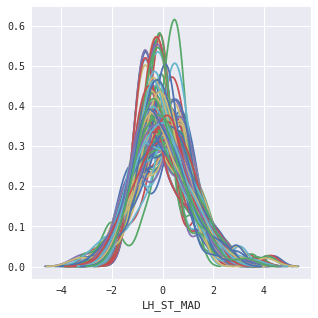

In [6]:
d=d_or
#d = normalize_pd(d, axis=0)
d = scale_pd(d, axis=0)
d = mean_center_pd(d)
#d = maxabs_scale_pd(d, axis=0)

fig, ax = plt.subplots(figsize=(5,5))
for c in d:
    sns.distplot(d[c], hist=False)

In [7]:
d.index.get_level_values(2)

Index(['1.1', '1.2', '1.3', '1.4', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2', '5.3', '5.4', '1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2', '5.3', '5.4'], dtype='object', name='Animal')

In [8]:
[i for i in d.columns]

['mouse length (cm)',
 'Normalized average run speed',
 'RF_Stand_(s)_Mean',
 'RF_StandIndex_Mean',
 'RF_MaxContactAt_(%)_Mean',
 'RF_MaxContactArea_(cm²)_Mean',
 'RF_MaxContactMaxIntensity_Mean',
 'RF_MaxContactMeanIntensity_Mean',
 'RF_PrintLength_(cm)_Mean',
 'RF_PrintWidth_(cm)_Mean',
 'RF_PrintArea_(cm²)_Mean',
 'RF_MaxIntensityAt_(%)_Mean',
 'RF_MaxIntensity_Mean',
 'RF_MinIntensity_Mean',
 'RF_MeanIntensity_Mean',
 'RF_MeanIntensityOfThe15MostIntensePixels_Mean',
 'RF_Swing_(s)_Mean',
 'RF_SwingSpeed_(cm/s)_Mean',
 'RF_StrideLength_(cm)_Mean',
 'RF_StepCycle_(s)_Mean',
 'RF_DutyCycle_(%)_Mean',
 'RF_SingleStance_(s)_Mean',
 'RF_InitialDualStance_(s)_Mean',
 'RF_TerminalDualStance_(s)_Mean',
 'RF_BodySpeed_(cm/s)_Mean',
 'RH_Stand_(s)_Mean',
 'RH_StandIndex_Mean',
 'RH_MaxContactAt_(%)_Mean',
 'RH_MaxContactArea_(cm²)_Mean',
 'RH_MaxContactMaxIntensity_Mean',
 'RH_MaxContactMeanIntensity_Mean',
 'RH_PrintLength_(cm)_Mean',
 'RH_PrintWidth_(cm)_Mean',
 'RH_PrintArea_(cm²)_Mean',
 

In [9]:
#sd, smd, sfull_df = preprocess_vc(sep_runs_data_fp, version = 3, use_vars_fp='data/use_variables.csv')

# Explore parameters

## 1. heatmap of parameters

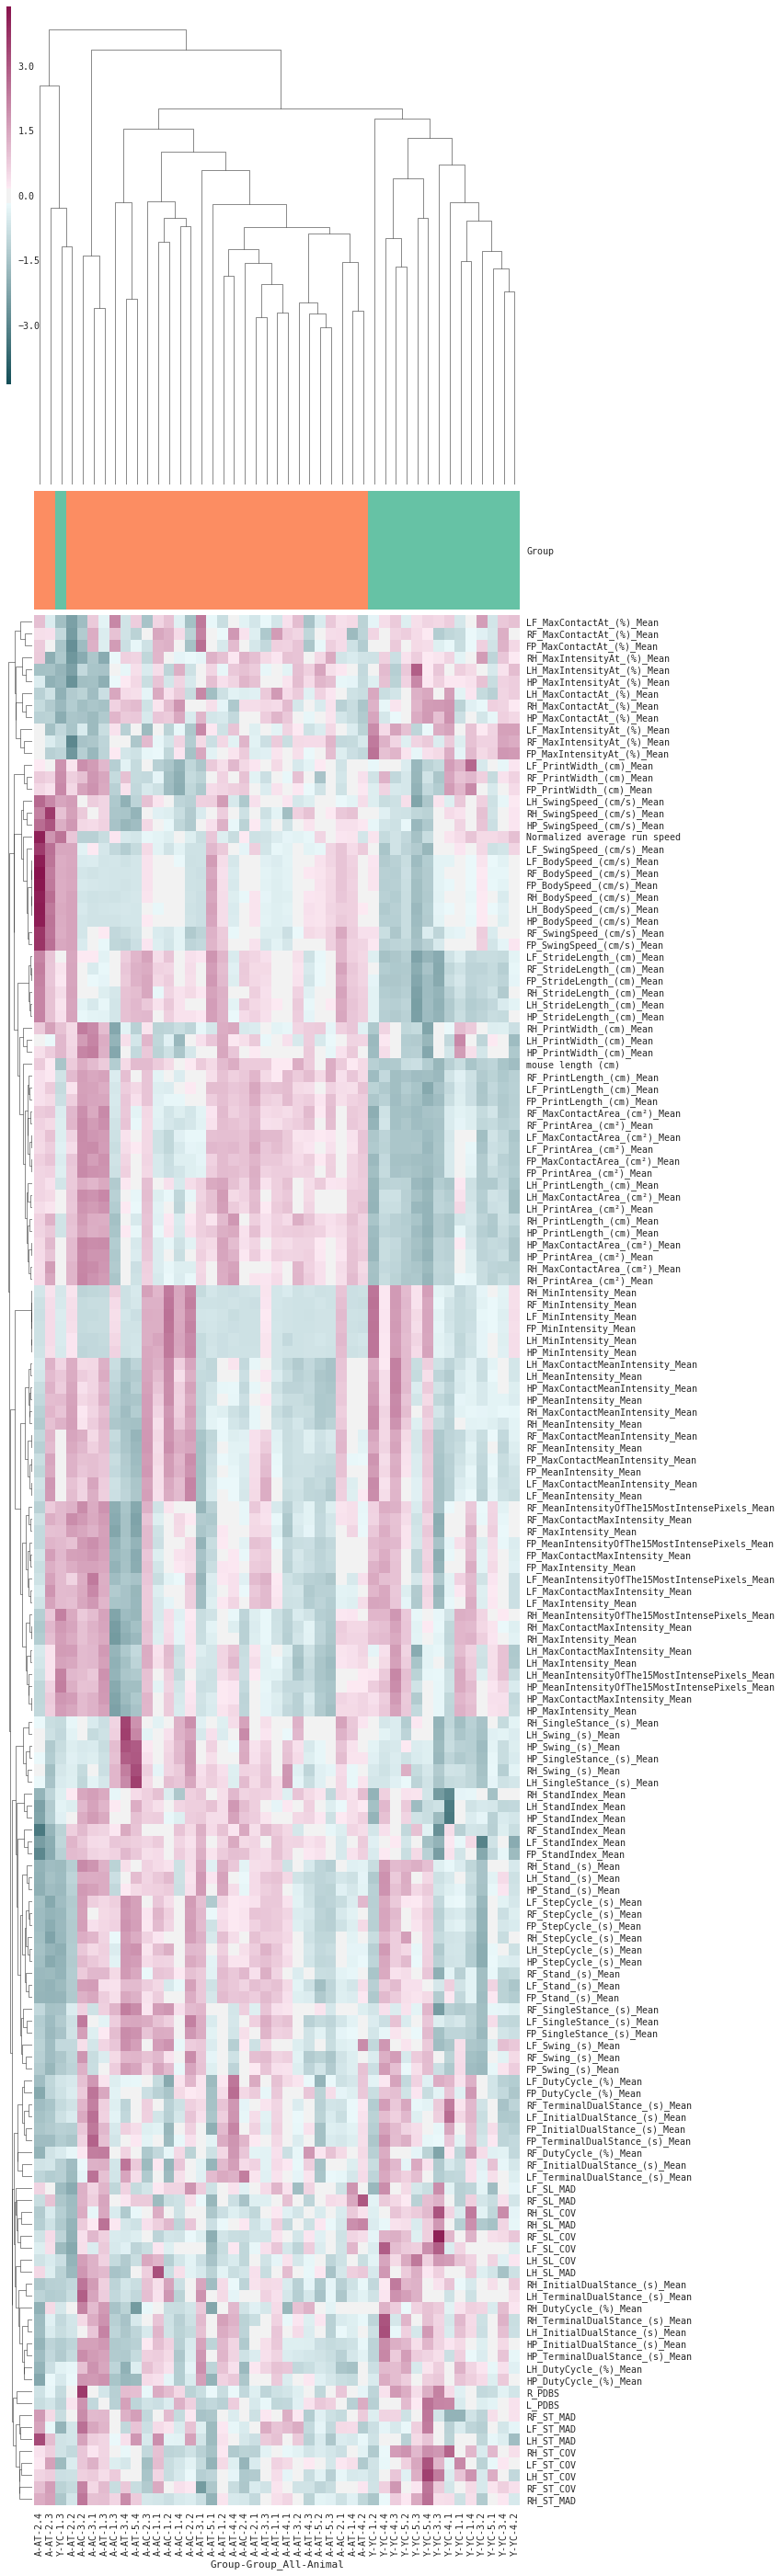

In [10]:
heatmap_with_levels(d.T, use_index_level='Group', figsize=(10,50));

## 2. I'd like to know which variables seem promising.

In [11]:
selected_a, _ = sel_anova(d, md['Group'], mode = 'classif')
print("Features selected by f_regression")
selected_a.ix[selected_a.pval < 0.05]

Features selected by f_regression


param          pval
0                                mouse length (cm)  5.771471e-16
100                       FP_PrintLength_(cm)_Mean  1.274370e-14
54                        LF_PrintLength_(cm)_Mean  5.442695e-14
8                         RF_PrintLength_(cm)_Mean  1.743071e-13
123                       HP_PrintLength_(cm)_Mean  1.799055e-12
77                        LH_PrintLength_(cm)_Mean  2.718884e-12
31                        RH_PrintLength_(cm)_Mean  5.487773e-11
97                    FP_MaxContactArea_(cm²)_Mean  8.070878e-10
5                     RF_MaxContactArea_(cm²)_Mean  9.771617e-10
102                        FP_PrintArea_(cm²)_Mean  2.148454e-09
10                         RF_PrintArea_(cm²)_Mean  2.193083e-09
87                       LH_StrideLength_(cm)_Mean  3.673875e-09
133                      HP_StrideLength_(cm)_Mean  4.192022e-09
110                      FP_StrideLength_(cm)_Mean  4.551577e-09
64                       LF_StrideLength_(cm)_Mean  5.524064e-09
51                    LF_MaxContactArea_(cm²)_Mean  5.601976e-09
18                       RF_StrideLength_(cm)_Mean  6.666511e-09
41                       RH_StrideLength_(cm)_Mean  1.080061e-08
56                         LF_PrintArea_(cm²)_Mean  1.220865e-08
125                        HP_PrintArea_(cm²)_Mean  2.064104e-08
79                         LH_PrintArea_(cm²)_Mean  4.969910e-08
120                   HP_MaxContactArea_(cm²)_Mean  5.101115e-08
74                    LH_MaxContactArea_(cm²)_Mean  1.028172e-07
33                         RH_PrintArea_(cm²)_Mean  1.225235e-07
28                    RH_MaxContactArea_(cm²)_Mean  2.542527e-07
136                       HP_SingleStance_(s)_Mean  2.135156e-05
44                        RH_SingleStance_(s)_Mean  1.009408e-04
90                        LH_SingleStance_(s)_Mean  1.274397e-04
103                     FP_MaxIntensityAt_(%)_Mean  1.514950e-04
147                                      RH_ST_COV  1.591888e-04
131                              HP_Swing_(s)_Mean  1.662838e-04
85                               LH_Swing_(s)_Mean  2.079026e-04
145                                      LH_SL_COV  3.005459e-04
142                                      RF_SL_COV  3.629348e-04
95                              FP_StandIndex_Mean  4.513239e-04
49                              LF_StandIndex_Mean  4.755026e-04
57                      LF_MaxIntensityAt_(%)_Mean  5.119413e-04
118                             HP_StandIndex_Mean  6.928290e-04
72                              LH_StandIndex_Mean  8.465407e-04
21                        RF_SingleStance_(s)_Mean  1.472454e-03
39                               RH_Swing_(s)_Mean  1.768165e-03
38   RH_MeanIntensityOfThe15MostIntensePixels_Mean  2.754846e-03
11                      RF_MaxIntensityAt_(%)_Mean  2.754865e-03
113                       FP_SingleStance_(s)_Mean  2.846522e-03
26                              RH_StandIndex_Mean  2.898179e-03
3                               RF_StandIndex_Mean  3.261193e-03
149                                      LH_ST_COV  8.948753e-03
130  HP_MeanIntensityOfThe15MostIntensePixels_Mean  1.014663e-02
144                                      LF_SL_COV  1.358834e-02
143                                      RH_SL_COV  1.469923e-02
2                                RF_Stand_(s)_Mean  1.501540e-02
67                        LF_SingleStance_(s)_Mean  1.967414e-02
35                            RH_MaxIntensity_Mean  1.987885e-02
29                  RH_MaxContactMaxIntensity_Mean  2.265485e-02
88                           LH_StepCycle_(s)_Mean  3.665322e-02
84   LH_MeanIntensityOfThe15MostIntensePixels_Mean  4.358882e-02
94                               FP_Stand_(s)_Mean  4.782083e-02

Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: Y, orange: A)


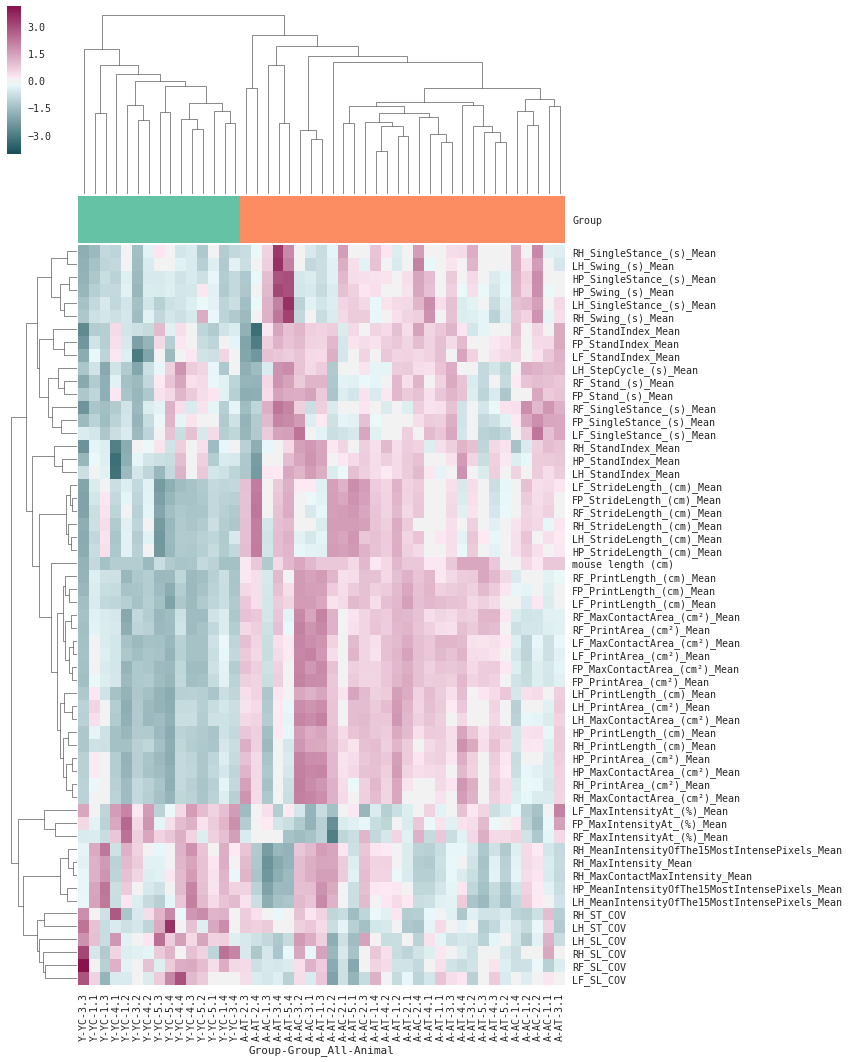

In [12]:
sel = selected_a.param[selected_a.pval < 0.05].tolist()
heatmap_with_levels(d.T.loc[sel], use_index_level='Group', figsize=(10,18));
print("Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: Y, orange: A)")

Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: YC, orange: AC, blue: AT)


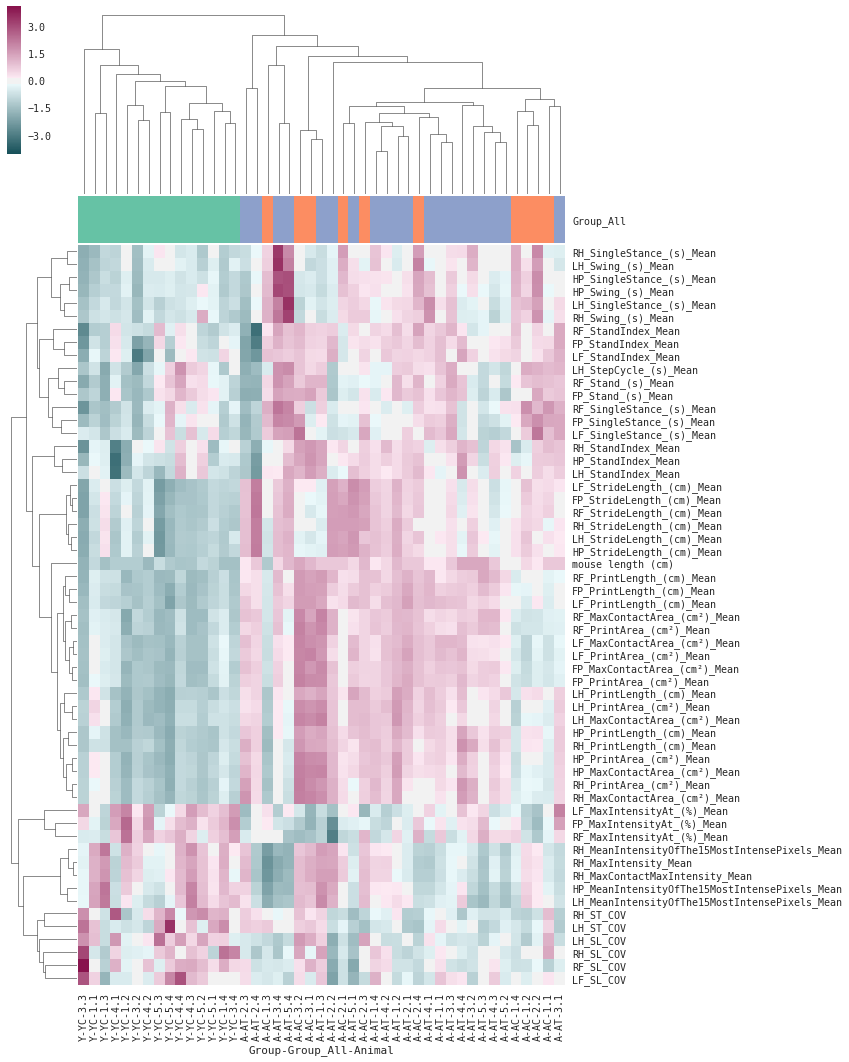

In [13]:
sel = selected_a.param[selected_a.pval < 0.05].tolist()
heatmap_with_levels(d.T.loc[sel], use_index_level='Group_All', figsize=(10,18));
print("Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: YC, orange: AC, blue: AT)")

## 3.  Descriptive stats

In [14]:
d.groupby(level="Group").describe().T#.unstack()

Group                                             A                                                                           Y                                                                      
                                              count      mean       std       min       25%       50%       75%       max count      mean       std       min       25%       50%       75%       max
mouse length (cm)                              30.0  0.626670  0.543067 -1.241841  0.267341  0.770401  0.985998  1.345327  15.0 -1.253339  0.280682 -1.780834 -1.464624 -1.241841 -1.098109 -0.810646
Normalized average run speed                   30.0 -0.072670  1.023206 -1.152782 -0.636523 -0.339067  0.228669  4.094137  15.0  0.145340  1.005810 -1.505703 -0.786648  0.301249  0.552154  2.477003
RF_Stand_(s)_Mean                              30.0  0.254847  0.921349 -1.739085 -0.304319  0.426297  0.956319  1.729359  15.0 -0.509693  1.019003 -1.961858 -1.320193 -0.337827  0.244301  1.407813
RF_StandIndex_Mean                             30.0  0.303488  0.951578 -3.284074  0.057722  0.490385  0.867805  1.457175  15.0 -0.606976  0.864003 -2.702965 -1.045487 -0.664621 -0.206805  0.989396
RF_MaxContactAt_(%)_Mean                       30.0  0.054923  1.127942 -2.447064 -0.933755  0.211670  0.681323  2.192425  15.0 -0.109846  0.748005 -1.242281 -0.745661 -0.161763  0.510760  1.298287
RF_MaxContactArea_(cm²)_Mean                   30.0  0.540642  0.715832 -0.666645  0.120419  0.655870  1.031151  2.033571  15.0 -1.081283  0.523283 -2.004360 -1.514788 -1.158193 -0.599262 -0.368221
RF_MaxContactMaxIntensity_Mean                 30.0 -0.094868  1.089164 -2.266236 -0.743192 -0.115579  0.465016  1.973920  15.0  0.189736  0.836144 -2.042326 -0.163892  0.411393  0.765046  1.150770
RF_MaxContactMeanIntensity_Mean                30.0  0.066302  1.065070 -1.816978 -0.736314 -0.293993  1.101974  1.835622  15.0 -0.132604  0.914467 -1.349260 -0.891200 -0.356309  0.519348  1.507129
RF_PrintLength_(cm)_Mean                       30.0  0.600284  0.589864 -0.509860  0.205079  0.589085  1.032596  1.606422  15.0 -1.200567  0.420809 -1.728618 -1.584709 -1.271977 -0.852852 -0.396016
RF_PrintWidth_(cm)_Mean                        30.0 -0.047131  0.942593 -1.976873 -0.869351  0.049118  0.692248  1.778490  15.0  0.094263  1.166010 -1.791835 -0.802801  0.336244  1.044951  1.951159
RF_PrintArea_(cm²)_Mean                        30.0  0.533349  0.740530 -0.723888  0.123323  0.622647  0.951789  2.045429  15.0 -1.066698  0.499665 -1.861339 -1.514873 -1.076431 -0.597806 -0.288911
RF_MaxIntensityAt_(%)_Mean                     30.0 -0.308298  0.945652 -2.943925 -0.893529 -0.357372  0.489265  1.217752  15.0  0.616596  0.866531 -0.826294  0.056265  0.647863  1.087721  2.346443
RF_MaxIntensity_Mean                           30.0 -0.146365  1.059269 -2.195500 -0.895536 -0.135293  0.526652  1.635242  15.0  0.292730  0.867363 -1.978026 -0.114418  0.299795  0.908380  1.354245
RF_MinIntensity_Mean                           30.0 -0.128079  0.999422 -0.892922 -0.757088 -0.715643  0.411083  2.431004  15.0  0.256158  1.019703 -0.893461 -0.451429 -0.171126  0.764615  2.505322
RF_MeanIntensity_Mean                          30.0  0.064358  1.065784 -1.716323 -0.787249 -0.254174  1.051728  1.933748  15.0 -0.128716  0.913637 -1.387036 -0.889597 -0.317875  0.494306  1.544331
RF_MeanIntensityOfThe15MostIntensePixels_Mean  30.0 -0.147871  1.091530 -2.126820 -0.935970 -0.199469  0.390581  1.994966  15.0  0.295741  0.778294 -1.495714 -0.184520  0.553164  0.844344  1.350511
RF_Swing_(s)_Mean                              30.0  0.043929  1.002332 -1.637600 -0.737938 -0.160729  0.922172  1.990815  15.0 -0.087857  1.058668 -1.661660 -0.845783 -0.023354  0.636524  1.664819
RF_SwingSpeed_(cm/s)_Mean                      30.0  0.160263  1.082460 -1.307372 -0.593642 -0.033228  0.635798  3.656587  15.0 -0.320527  0.788694 -1.575621 -0.868447 -0.370340  0.131339  1.335713
RF_StrideLength_(cm)_Mean               

In [15]:
d.groupby(level="Group_All").describe().T#.unstack()

Group_All                                        AC                                                                          AT                                                                          YC                                                                      
                                              count      mean       std       min       25%       50%       75%       max count      mean       std       min       25%       50%       75%       max count      mean       std       min       25%       50%       75%       max
mouse length (cm)                              10.0  0.511684  0.747772 -1.241841  0.267341  0.770401  0.985998  1.345327  20.0  0.684162  0.418137 -0.091988  0.411072  0.770401  0.842267  1.345327  15.0 -1.253339  0.280682 -1.780834 -1.464624 -1.241841 -1.098109 -0.810646
Normalized average run speed                   10.0 -0.298190  0.524219 -1.152782 -0.460381 -0.290285  0.167083  0.265511  20.0  0.040090  1.194845 -0.878796 -0.653073 -0.414440  0.347627  4.094137  15.0  0.145340  1.005810 -1.505703 -0.786648  0.301249  0.552154  2.477003
RF_Stand_(s)_Mean                              10.0  0.592087  0.529709 -0.314882  0.252135  0.801782  0.956319  1.137213  20.0  0.086227  1.035841 -1.739085 -0.586610  0.049710  0.906217  1.729359  15.0 -0.509693  1.019003 -1.961858 -1.320193 -0.337827  0.244301  1.407813
RF_StandIndex_Mean                             10.0  0.446311  0.590093 -0.463249  0.032714  0.370976  0.835514  1.457175  20.0  0.232077  1.095917 -3.284074  0.108163  0.496497  0.814430  1.430502  15.0 -0.606976  0.864003 -2.702965 -1.045487 -0.664621 -0.206805  0.989396
RF_MaxContactAt_(%)_Mean                       10.0  0.397850  0.967826 -1.291164  0.154268  0.452718  1.181863  1.492437  20.0 -0.116540  1.185464 -2.447064 -1.025012 -0.114881  0.454436  2.192425  15.0 -0.109846  0.748005 -1.242281 -0.745661 -0.161763  0.510760  1.298287
RF_MaxContactArea_(cm²)_Mean                   10.0  0.215869  0.936899 -0.666645 -0.553135 -0.132251  0.794637  1.933279  20.0  0.703028  0.532020 -0.335334  0.460541  0.741104  1.082346  2.033571  15.0 -1.081283  0.523283 -2.004360 -1.514788 -1.158193 -0.599262 -0.368221
RF_MaxContactMaxIntensity_Mean                 10.0  0.229417  1.062137 -2.050482 -0.184988  0.252359  0.819135  1.716605  20.0 -0.257011  1.092353 -2.266236 -1.019622 -0.304768  0.332987  1.973920  15.0  0.189736  0.836144 -2.042326 -0.163892  0.411393  0.765046  1.150770
RF_MaxContactMeanIntensity_Mean                10.0  0.875065  0.931276 -0.908798  0.512022  1.223853  1.580037  1.835622  20.0 -0.338080  0.896776 -1.816978 -0.885881 -0.442850  0.104547  1.529463  15.0 -0.132604  0.914467 -1.349260 -0.891200 -0.356309  0.519348  1.507129
RF_PrintLength_(cm)_Mean                       10.0  0.378127  0.782668 -0.509860 -0.242394  0.156966  0.891740  1.606422  20.0  0.711362  0.449375 -0.161943  0.385468  0.714197  1.046448  1.564710  15.0 -1.200567  0.420809 -1.728618 -1.584709 -1.271977 -0.852852 -0.396016
RF_PrintWidth_(cm)_Mean                        10.0 -0.354126  1.213714 -1.976873 -0.940930 -0.766407  0.641651  1.778490  20.0  0.106366  0.764143 -1.485551 -0.253794  0.115843  0.662796  1.491368  15.0  0.094263  1.166010 -1.791835 -0.802801  0.336244  1.044951  1.951159
RF_PrintArea_(cm²)_Mean                        10.0  0.222200  1.022183 -0.723888 -0.588024 -0.141364  0.756698  2.045429  20.0  0.688924  0.515408 -0.357266  0.375475  0.709279  0.977124  1.940127  15.0 -1.066698  0.499665 -1.861339 -1.514873 -1.076431 -0.597806 -0.288911
RF_MaxIntensityAt_(%)_Mean                     10.0 -0.311835  1.013526 -1.500294 -1.180099 -0.464953  0.449301  1.209753  20.0 -0.306529  0.937189 -2.943925 -0.807305 -0.357372  0.479262  1.217752  15.0  0.616596  0.866531 -0.826294  0.056265  0.647863  1.087721  2.346443
RF_MaxIntensity_Mean                           10.0  0.146810  1.079818 -2.195500 -0.101188  0.088018  0.964613  1.489705  20.0 -0.292952  1.045193 -2.193207 -1.015

## 4. Plot the aggregate parameters

Plot coefficients of variation:

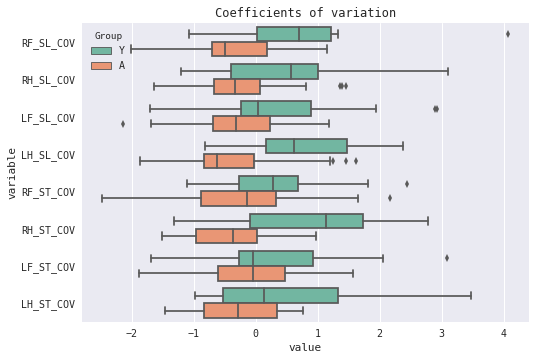

In [16]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('COV')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

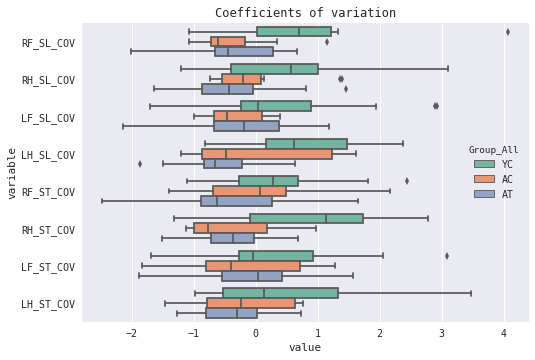

In [17]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('COV')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Coefficients of variation');

Collapse left and right parameters:

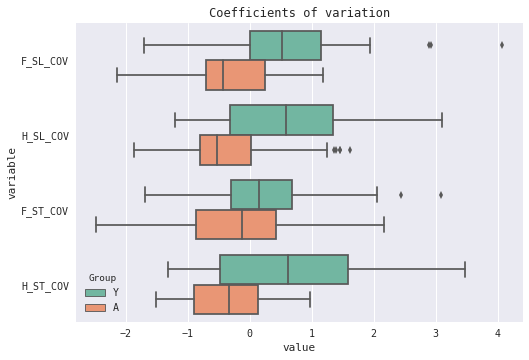

In [18]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

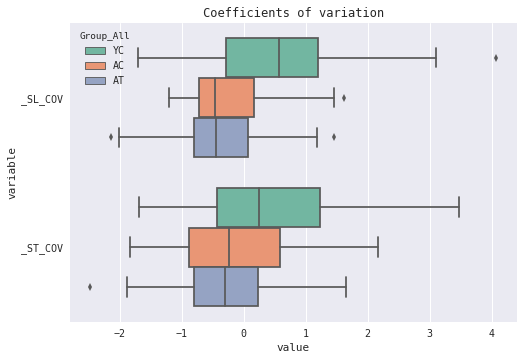

In [19]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Coefficients of variation');

Just as another way to visualize this:

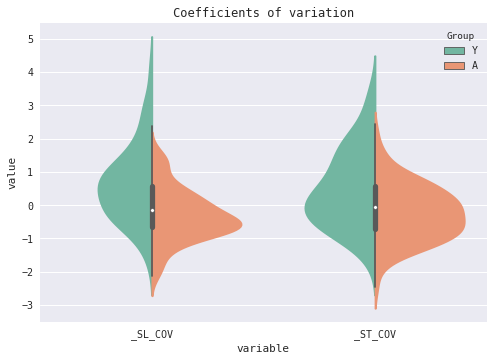

In [20]:
sns.violinplot(y="value", x="variable", hue="Group", data=d_,
               split=True, palette=color_map);
plt.title('Coefficients of variation');

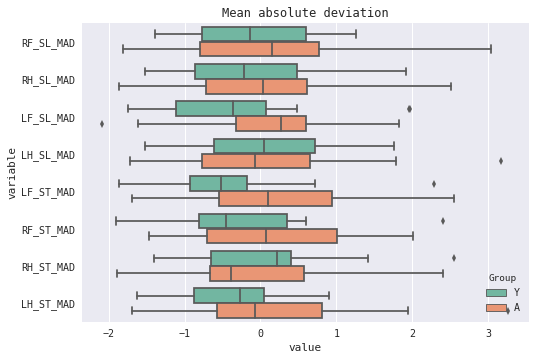

In [21]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

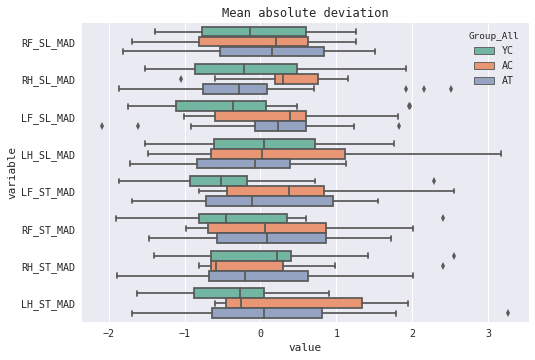

In [22]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Mean absolute deviation');

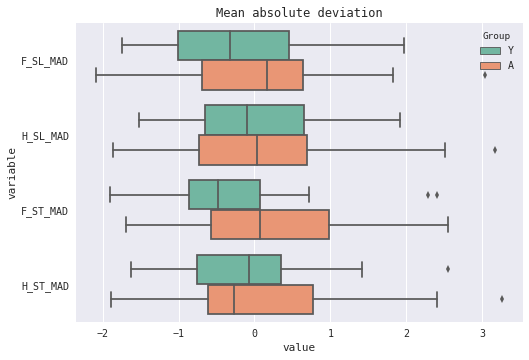

In [23]:
#be agnostic to L R
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)

d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

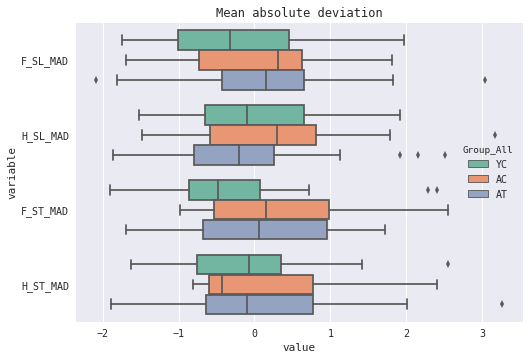

In [24]:
#be agnostic to L R
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Mean absolute deviation');

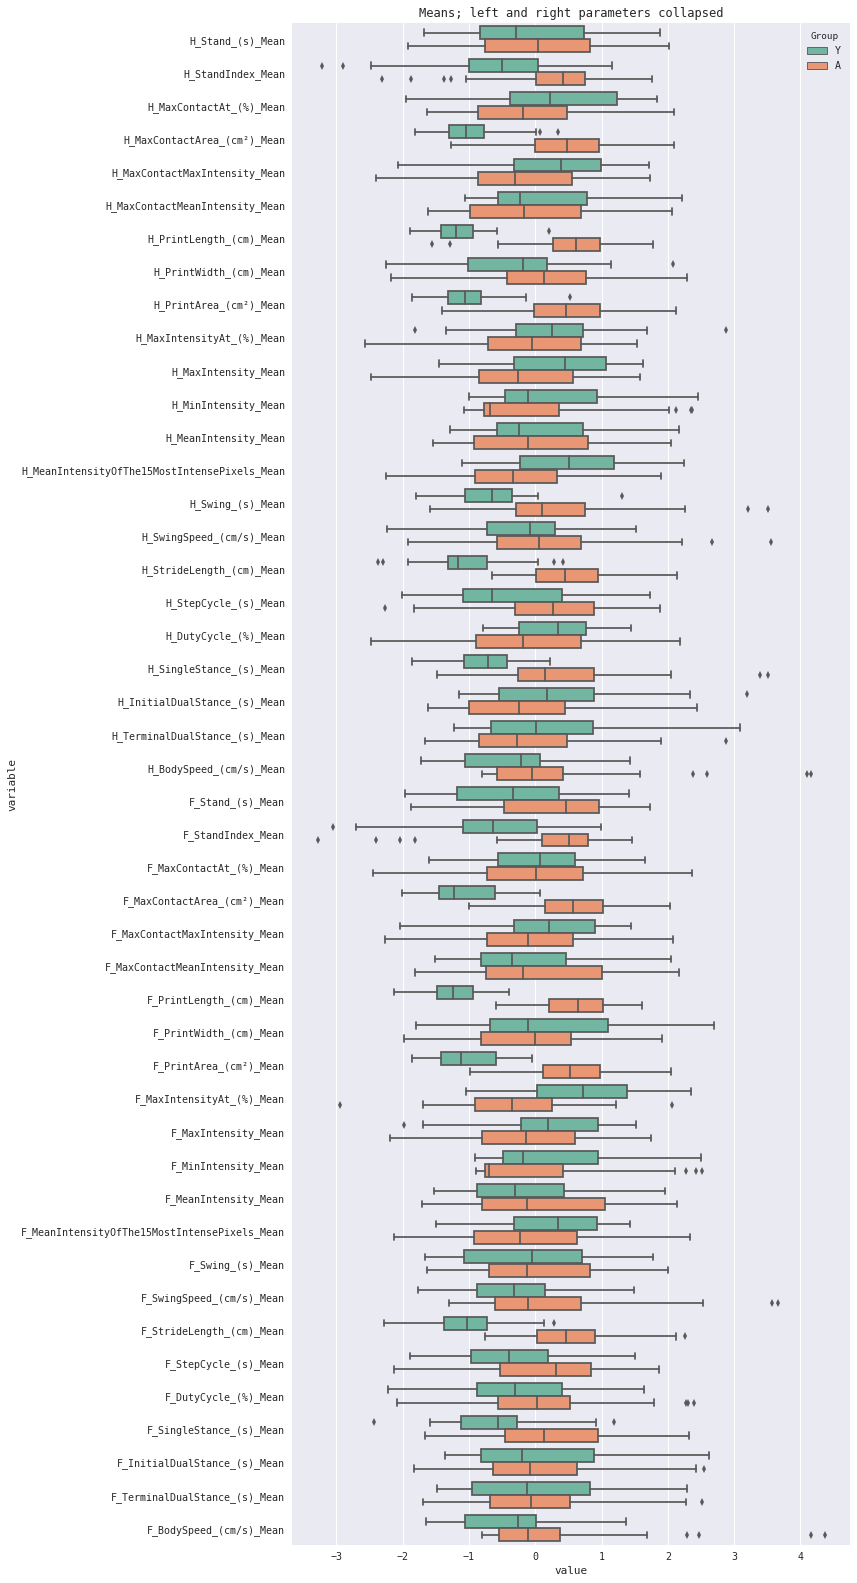

In [25]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = only_LR(d).ix[:,only_LR(d).columns.str.contains('Mean')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
plt.figure(figsize=(10, 28))
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Means; left and right parameters collapsed');

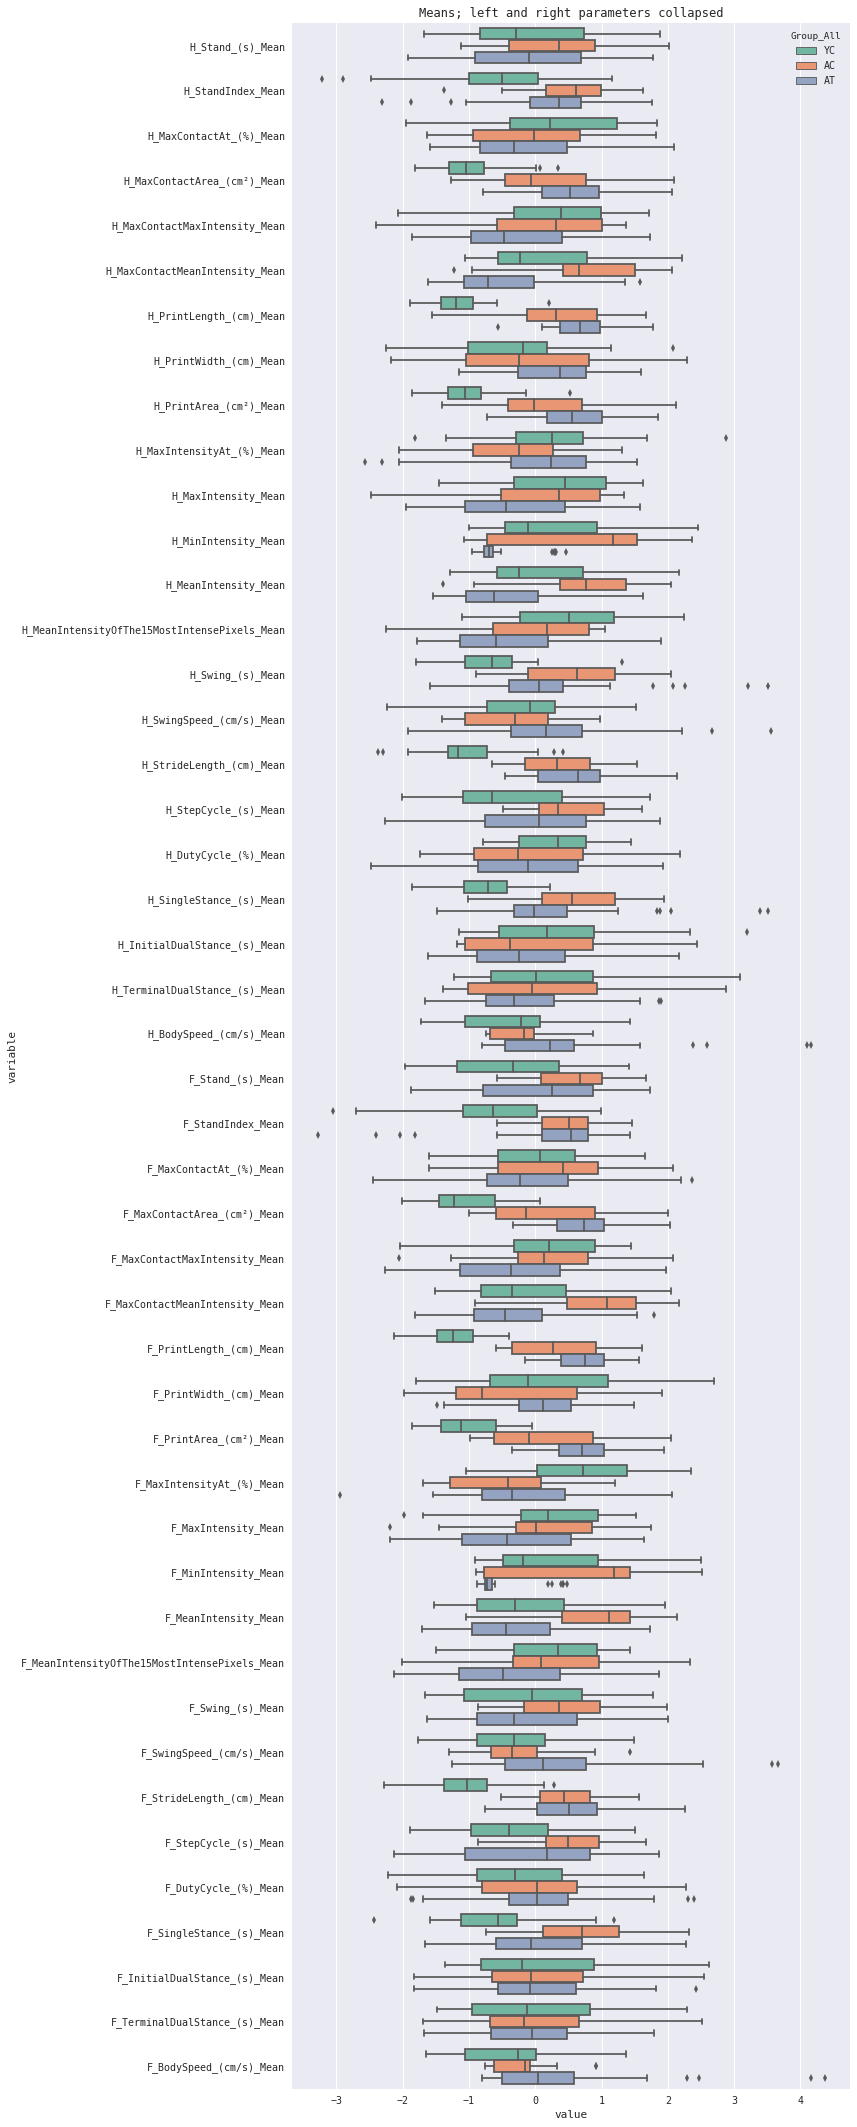

In [26]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = only_LR(d).ix[:,only_LR(d).columns.str.contains('Mean')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
plt.figure(figsize=(10, 38))
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group_All', palette=color_mapYAT);
plt.title('Means; left and right parameters collapsed');

# Left side - right side relationships - 'laterality'
Values in the table are correlations between each left-side gait parameter and the corresponding right-seid gait parameter. Lowest correlations are sorted first.

Parameters:

- correlation - using sklearn pairwise_distances
- ma_difference - pointwise mean absolute difference ( mean(abs(L-R)) )
- covariance - between the two numeric vectors
- mse - mean squared error (regression line-based)

### 1. First, let's compare Y and A

In [27]:
madiff = dist_L_R(d, metric='ma_difference', use_level=0)
covs = dist_L_R(d, metric='covariance', use_level=0)
corrs = dist_L_R(d, metric='correlation', use_level=0)
mse = dist_L_R(d, metric='mse', use_level=0)

In [28]:
#corrs.groupby(corrs.index.get_level_values(0)).apply(lambda x: x.sort_values('correlation', ascending=True))
#corrs.sort_values('correlation', ascending=True).head(10)

In [29]:
distances = pd.merge(corrs, madiff)
distances = pd.merge(distances, covs)
distances = pd.merge(distances, mse)

In [30]:
print("Various co-measures between the left and right side parameter")
distances.sort_values('correlation', ascending=True)

Various co-measures between the left and right side parameter


group                                     parameter  correlation  ma_difference  covariance       mse
83      Y                  H_InitialDualStance_(s)_Mean    -0.039210       1.194399   -0.040442  2.062019
106     Y                              H_Swing_(s)_Mean     0.147617       0.532609    0.055068  0.608287
56      Y                  F_InitialDualStance_(s)_Mean     0.150308       1.079551    0.160981  1.755471
55      Y                          F_DutyCycle_(%)_Mean     0.180950       0.966008    0.170391  1.578886
107     Y                 H_TerminalDualStance_(s)_Mean     0.204711       0.986410    0.206941  1.575716
58      Y                       F_MaxContactAt_(%)_Mean     0.230311       0.765082    0.142545  1.000706
7       A                     F_MaxIntensityAt_(%)_Mean     0.286897       0.886795    0.231357  1.121986
16      A                                      F_SL_MAD     0.292829       0.994045    0.289769  1.398226
80      Y                 F_TerminalDualStance_(s)_Mean     0.305942       0.874921    0.312659  1.472750
96      Y                                      H_SL_COV     0.350248       1.052523    0.391329  1.511615
97      Y                                      H_SL_MAD     0.361410       0.872624    0.345152  1.172279
82      Y                          H_DutyCycle_(%)_Mean     0.380125       0.557762    0.156439  0.488858
43      A                                      H_SL_MAD     0.397603       0.927257    0.429324  1.265576
100     Y                       H_SingleStance_(s)_Mean     0.429209       0.411975    0.099463  0.309448
1       A                          F_DutyCycle_(%)_Mean     0.439237       0.869680    0.464661  1.183732
29      A                  H_InitialDualStance_(s)_Mean     0.456513       0.800851    0.441653  1.030421
26      A                 F_TerminalDualStance_(s)_Mean     0.457347       0.753969    0.463669  1.102569
2       A                  F_InitialDualStance_(s)_Mean     0.462099       0.762838    0.469302  1.071425
28      A                          H_DutyCycle_(%)_Mean     0.470965       0.951408    0.593120  1.288900
53      A                 H_TerminalDualStance_(s)_Mean     0.490496       0.790397    0.492883  1.013042
74      Y                             F_StandIndex_Mean     0.494461       0.730029    0.437340  0.868379
98      Y                                      H_ST_COV     0.497619       0.843998    0.766163  1.509388
61      Y                     F_MaxIntensityAt_(%)_Mean     0.500985       0.671505    0.414900  0.786348
73      Y                       F_SingleStance_(s)_Mean     0.507087       0.628019    0.343581  0.673120
31      A                       H_MaxContactAt_(%)_Mean     0.569458       0.750267    0.536477  0.803041
88      Y                     H_MaxIntensityAt_(%)_Mean     0.600064       0.717177    0.527613  0.776473
46      A                       H_SingleStance_(s)_Mean     0.622129       0.691472    0.598873  0.707887
45      A                                      H_ST_MAD     0.631872       0.647789    0.695759  0.841569
4       A                       F_MaxContactAt_(%)_Mean     0.636898       0.709719    0.782120  0.889944
18      A                                      F_ST_MAD     0.639178       0.626432    0.615164  0.675222
99      Y                                      H_ST_MAD     0.640842       0.797001    0.468923  0.818562
70      Y                                      F_SL_MAD     0.641850       0.695348    0.633582  0.793269
52      A                              H_Swing_(s)_Mean     0.643997       0.678556    0.641448  0.689389
25      A                              F_Swing_(s)_Mean     0.645345       0.609591    0.637652  0.681383
41      A                        H_PrintWidth_(cm)_Mean     0.649656       0.667183    0.616975  0.665858
71      Y                                      F_ST_COV     0.656468       0.730563    0.752624  0.824113
42      A                                      H_SL_COV     0.657546       0.52622

###### Group by parameter name for easier comparison:

In [31]:
distances.groupby('parameter').apply(lambda x: x.sort_values('correlation', ascending=True)).drop('parameter',1)

group  correlation  ma_difference  covariance       mse
parameter                                                                                               
F_BodySpeed_(cm/s)_Mean                      54      Y     0.993493       0.070864    0.575704  0.007523
                                             0       A     0.996467       0.069113    1.164489  0.008075
F_DutyCycle_(%)_Mean                         55      Y     0.180950       0.966008    0.170391  1.578886
                                             1       A     0.439237       0.869680    0.464661  1.183732
F_InitialDualStance_(s)_Mean                 56      Y     0.150308       1.079551    0.160981  1.755471
                                             2       A     0.462099       0.762838    0.469302  1.071425
F_MaxContactArea_(cm²)_Mean                  57      Y     0.818157       0.241449    0.235338  0.099342
                                             3       A     0.843637       0.330921    0.448825  0.161816
F_MaxContactAt_(%)_Mean                      58      Y     0.230311       0.765082    0.142545  1.000706
                                             4       A     0.636898       0.709719    0.782120  0.889944
F_MaxContactMaxIntensity_Mean                5       A     0.888920       0.417040    1.013341  0.248593
                                             59      Y     0.900033       0.335486    0.725409  0.173761
F_MaxContactMeanIntensity_Mean               6       A     0.915467       0.358116    1.024308  0.183470
                                             60      Y     0.953354       0.249235    0.817913  0.076851
F_MaxIntensityAt_(%)_Mean                    7       A     0.286897       0.886795    0.231357  1.121986
                                             61      Y     0.500985       0.671505    0.414900  0.786348
F_MaxIntensity_Mean                          8       A     0.868403       0.453992    0.942484  0.282004
                                             62      Y     0.910316       0.347875    0.789956  0.180679
F_MeanIntensityOfThe15MostIntensePixels_Mean 9       A     0.852771       0.513707    1.011200  0.339962
                                             63      Y     0.864976       0.364827    0.566045  0.178235
F_MeanIntensity_Mean                         10      A     0.922840       0.356271    1.033575  0.167419
                                             64      Y     0.946123       0.257404    0.815462  0.088020
F_MinIntensity_Mean                          11      A     0.996904       0.059175    0.998701  0.006020
                                             65      Y     0.997308       0.059742    1.034024  0.005279
F_PrintArea_(cm²)_Mean                       66      Y     0.851762       0.222009    0.220206  0.072955
                                             12      A     0.863200       0.314687    0.492779  0.152157
F_PrintLength_(cm)_Mean                      13      A     0.764679       0.315855    0.262302  0.156164
                                             67      Y     0.777695       0.209424    0.126902  0.068879
F_PrintWidth_(cm)_Mean                       14      A     0.724384       0.524900    0.616252  0.455592
                                             68      Y     0.790064       0.587164    1.125131  0.563839
F_SL_COV                                     15      A     0.666236       0.440341    0.349281  0.350995
                                             69      Y     0.675895       0.810447    1.007419  0.952425
F_SL_MAD                                     16      A     0.292829       0.994045    0.289769  1.398226
                                             70      Y     0.641850       0.695348    0.633582  0.793269
F_ST_COV                                     71      Y     0.656468       0.730563    0.752624  0.824113
                                             17      A     0.678734       0.646958    0.602812  0.577046
F_ST_MAD                                     18      A     

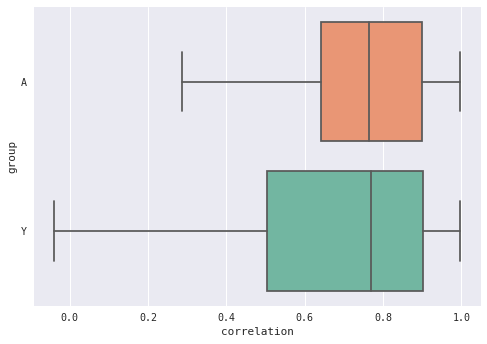

In [32]:
corrs_ = corrs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=corrs_, x='correlation', y='group', palette = color_map)#, hue='Group_All')

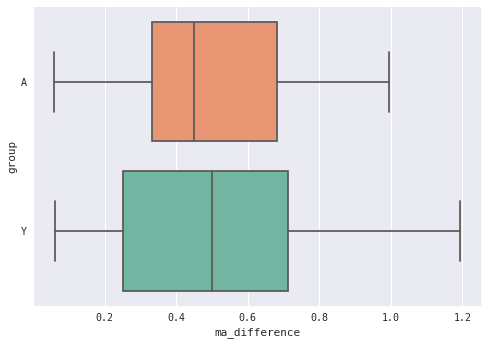

In [33]:
madiff_ = madiff.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=madiff_, x='ma_difference', y='group', palette = color_map)#, hue='Group_All')

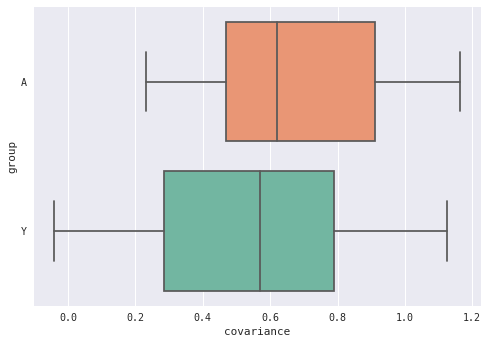

In [34]:
covs_ = covs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=covs_, x='covariance', y='group', palette = color_map)#, hue='Group_All')

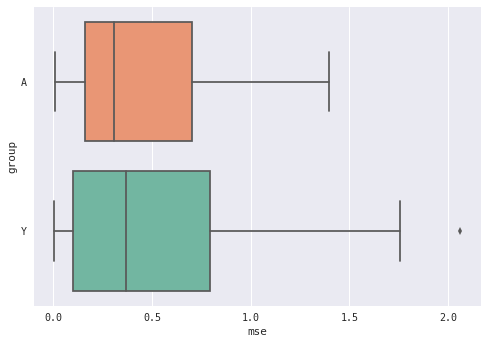

In [35]:
mse_ = mse.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=mse_, x='mse', y='group', palette=color_map)#, hue='Group_All')

### 2. Now, let's compare YC with AC and AT

In [36]:
madiff = dist_L_R(full_df, metric='ma_difference', use_level=1)
covs = dist_L_R(full_df, metric='covariance', use_level=1)
corrs = dist_L_R(d, metric='correlation', use_level=1)
mse = dist_L_R(d, metric='mse', use_level=1)

In [37]:
distances = pd.merge(corrs, madiff)
distances = pd.merge(distances, covs)
distances = pd.merge(distances, mse)

In [38]:
print("Various co-measures between the left and right side parameter")
distances.sort_values('correlation', ascending=True)

Various co-measures between the left and right side parameter


group                                     parameter  correlation  ma_difference  covariance       mse
137    YC                  H_InitialDualStance_(s)_Mean    -0.039210       0.032621   -0.000031  2.062019
15     AC                                      F_SL_COV     0.066838       0.018882    0.000028  0.575859
160    YC                              H_Swing_(s)_Mean     0.147617       0.014367    0.000042  0.608287
110    YC                  F_InitialDualStance_(s)_Mean     0.150308       0.014356    0.000027  1.755471
43     AC                                      H_SL_MAD     0.151218       0.248237    0.005012  1.953660
16     AC                                      F_SL_MAD     0.166582       0.147491    0.002705  1.512153
109    YC                          F_DutyCycle_(%)_Mean     0.180950       2.658571    1.277986  1.578886
95     AT                        H_PrintWidth_(cm)_Mean     0.182445       0.068937    0.000863  0.750315
161    YC                 H_TerminalDualStance_(s)_Mean     0.204711       0.027306    0.000163  1.575716
112    YC                       F_MaxContactAt_(%)_Mean     0.230311       4.134189    4.275467  1.000706
7      AC                     F_MaxIntensityAt_(%)_Mean     0.245939       4.912107    6.968007  1.217154
134    YC                 F_TerminalDualStance_(s)_Mean     0.305942       0.012400    0.000058  1.472750
61     AT                     F_MaxIntensityAt_(%)_Mean     0.317276       5.548174    9.289606  1.074402
94     AT                       H_PrintLength_(cm)_Mean     0.333139       0.080656    0.002621  0.290590
150    YC                                      H_SL_COV     0.350248       0.057314    0.001167  1.511615
2      AC                  F_InitialDualStance_(s)_Mean     0.351501       0.014306    0.000069  1.504303
70     AT                                      F_SL_MAD     0.355658       0.124860    0.006595  1.341262
151    YC                                      H_SL_MAD     0.361410       0.157656    0.012032  1.172279
19     AC                       F_SingleStance_(s)_Mean     0.374149       0.020629    0.000171  0.902203
136    YC                          H_DutyCycle_(%)_Mean     0.380125       2.879072    4.015505  0.488858
1      AC                          F_DutyCycle_(%)_Mean     0.381879       2.420357    3.512865  1.369725
82     AT                          H_DutyCycle_(%)_Mean     0.391180       5.133437   12.938001  1.501035
45     AC                                      H_ST_MAD     0.411018       0.006681    0.000036  1.285003
67     AT                       F_PrintLength_(cm)_Mean     0.412195       0.055549    0.001489  0.207121
68     AT                        F_PrintWidth_(cm)_Mean     0.416789       0.035644    0.000656  0.542359
154    YC                       H_SingleStance_(s)_Mean     0.429209       0.010525    0.000066  0.309448
26     AC                 F_TerminalDualStance_(s)_Mean     0.442812       0.012216    0.000116  1.517717
93     AT                        H_PrintArea_(cm²)_Mean     0.452362       0.082962    0.004903  0.383653
49     AC                          H_StepCycle_(s)_Mean     0.457580       0.026962    0.000485  0.376848
55     AT                          F_DutyCycle_(%)_Mean     0.475796       2.312284    3.674596  1.090736
80     AT                 F_TerminalDualStance_(s)_Mean     0.481561       0.009437    0.000076  0.894995
128    YC                             F_StandIndex_Mean     0.494461       0.621646    0.346384  0.868379
29     AC                  H_InitialDualStance_(s)_Mean     0.495762       0.030282    0.000414  1.615495
152    YC                                      H_ST_COV     0.497619       0.036633    0.001580  1.509388
84     AT                   H_MaxContactArea_(cm²)_Mean     0.497965       0.074560    0.005038  0.383511
85     AT                       H_MaxContactAt_(%)_Mean     0.499474       4.761191   16.589977  0.862599
115    YC                     F_MaxIntensityAt_(%)_Mean     0.500985       4.09123

###### Group by parameter name for easier comparison:

In [39]:
distances.groupby('parameter').apply(lambda x: x.sort_values('correlation', ascending=True)).drop('parameter',1)

group  correlation  ma_difference  covariance       mse
parameter                                                                                               
F_BodySpeed_(cm/s)_Mean                      0      AC     0.987163       0.219830    3.633488  0.006985
                                             108    YC     0.993493       0.266567    8.205597  0.007523
                                             54     AT     0.997089       0.278616   22.103913  0.008620
F_DutyCycle_(%)_Mean                         109    YC     0.180950       2.658571    1.277986  1.578886
                                             1      AC     0.381879       2.420357    3.512865  1.369725
                                             55     AT     0.475796       2.312284    3.674596  1.090736
F_InitialDualStance_(s)_Mean                 110    YC     0.150308       0.014356    0.000027  1.755471
                                             2      AC     0.351501       0.014306    0.000069  1.504303
                                             56     AT     0.590656       0.007450    0.000090  0.854986
F_MaxContactArea_(cm²)_Mean                  57     AT     0.565068       0.043967    0.001759  0.212328
                                             111    YC     0.818157       0.026758    0.002900  0.099342
                                             3      AC     0.974780       0.027929    0.012014  0.060791
F_MaxContactAt_(%)_Mean                      112    YC     0.230311       4.134189    4.275467  1.000706
                                             58     AT     0.576356       4.303298   21.323529  1.013091
                                             4      AC     0.827517       5.002895   29.708028  0.643651
F_MaxContactMaxIntensity_Mean                59     AT     0.878417       7.276658  267.552207  0.270924
                                             5      AC     0.895799       5.671222  244.318510  0.203930
                                             113    YC     0.900033       5.465723  190.174425  0.173761
F_MaxContactMeanIntensity_Mean               6      AC     0.860515       2.872320   53.703411  0.224505
                                             60     AT     0.899182       3.017859   52.912685  0.162953
                                             114    YC     0.953354       2.001130   58.195825  0.076851
F_MaxIntensityAt_(%)_Mean                    7      AC     0.245939       4.912107    6.968007  1.217154
                                             61     AT     0.317276       5.548174    9.289606  1.074402
                                             115    YC     0.500985       4.091237   14.823864  0.786348
F_MaxIntensity_Mean                          62     AT     0.848967       8.385320  267.377660  0.320435
                                             8      AC     0.897771       6.438742  274.548076  0.205142
                                             116    YC     0.910316       5.981299  227.850174  0.180679
F_MeanIntensityOfThe15MostIntensePixels_Mean 63     AT     0.831052       7.905425  196.197228  0.359732
                                             117    YC     0.864976       5.142528  122.699946  0.178235
                                             9      AC     0.875415       6.684400  251.508123  0.300422
F_MeanIntensity_Mean                         10     AC     0.884244       3.009220   54.954231  0.196105
                                             64     AT     0.907625       2.841160   52.414213  0.153076
                                             118    YC     0.946123       2.043737   56.334689  0.088020
F_MinIntensity_Mean                          65     AT     0.982398       0.414945    8.564303  0.005576
                                             119    YC     0.997308       0.423184   54.441715  0.005279
                                             11     AC     0.997550       0.553875   81.830850  0.006909
F_PrintArea_(cm²)_Mean                       66     AT     

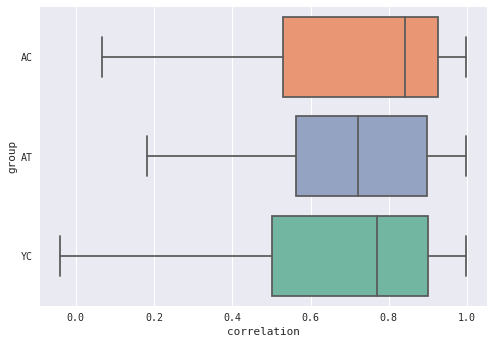

In [40]:
corrs_ = corrs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=corrs_, x='correlation', y='group', palette = color_mapYAT)#, hue='Group_All')

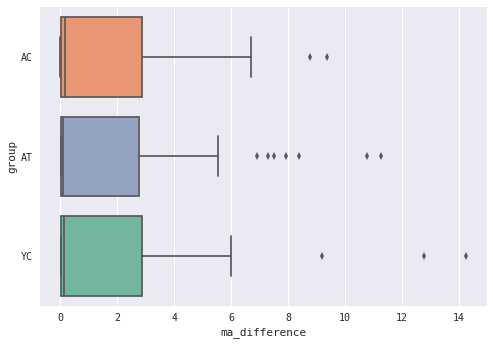

In [41]:
madiff_ = madiff.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=madiff_, x='ma_difference', y='group', palette = color_mapYAT)#, hue='Group_All')

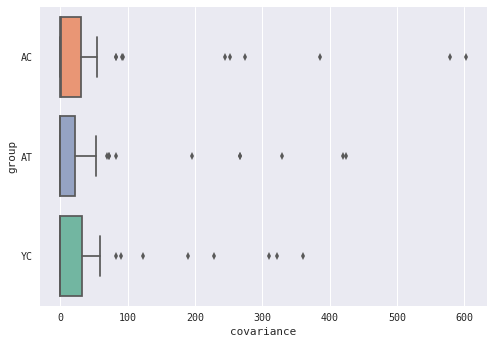

In [42]:
covs_ = covs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=covs_, x='covariance', y='group', palette = color_mapYAT)#, hue='Group_All')

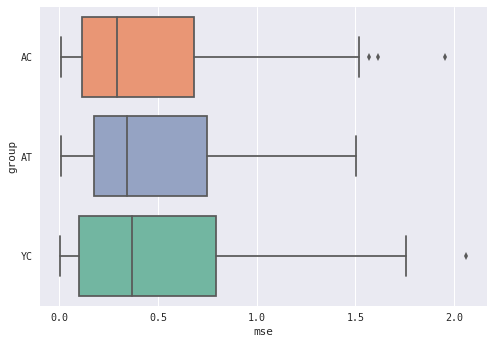

In [43]:
mse_ = mse.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=mse_, x='mse', y='group', palette = color_mapYAT)#, hue='Group_All')

### Visualize with heatmaps

How correlated are sided parameters?

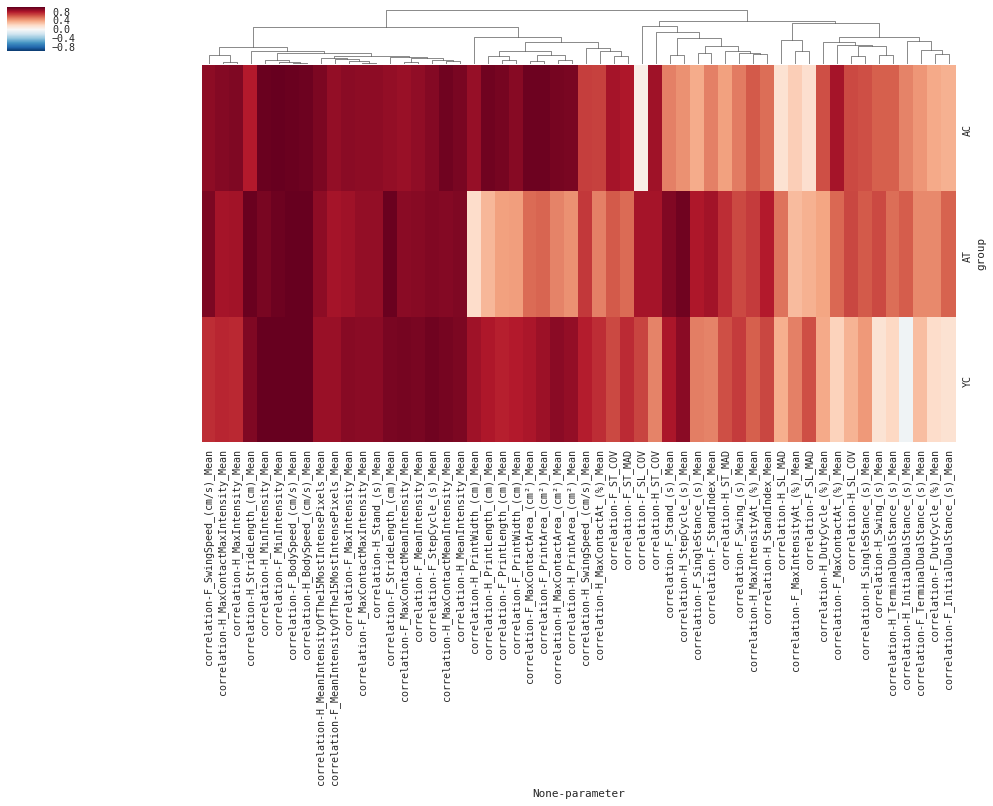

In [44]:
#plt.figure( figsize=(5,17))
sns.clustermap(corrs.pivot_table(columns='parameter', index='group'), row_cluster=False, figsize=(17,8));

What about the mean absolute difference?

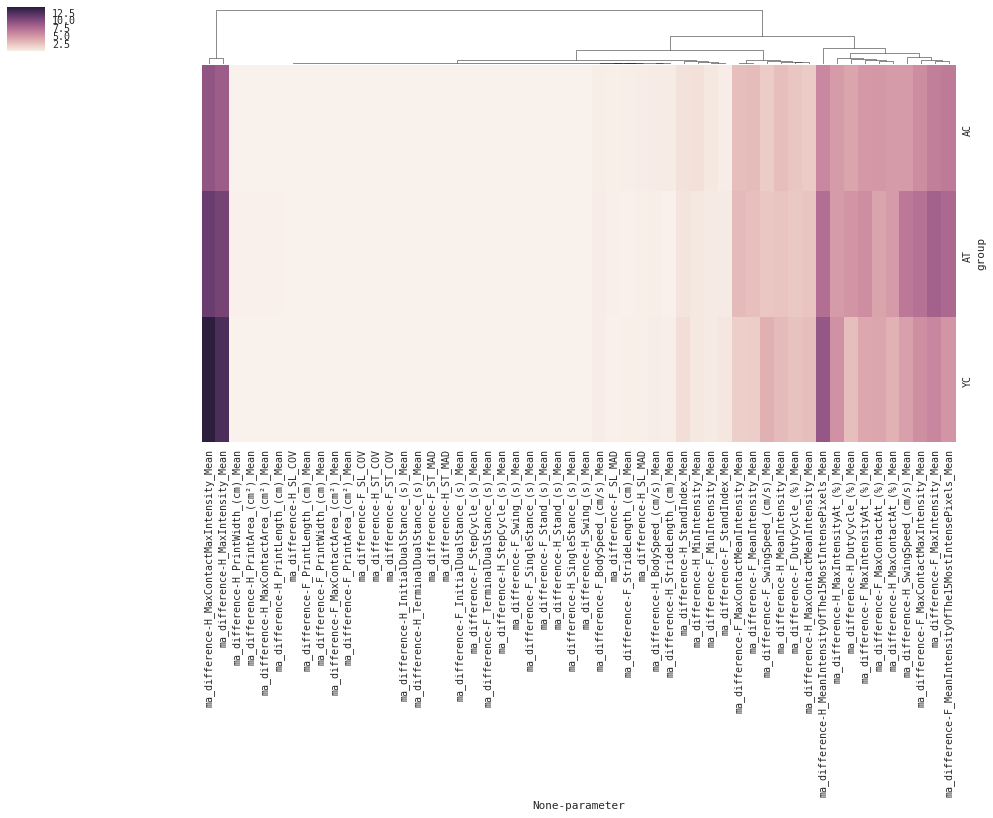

In [45]:
sns.clustermap(
    madiff.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Covariance

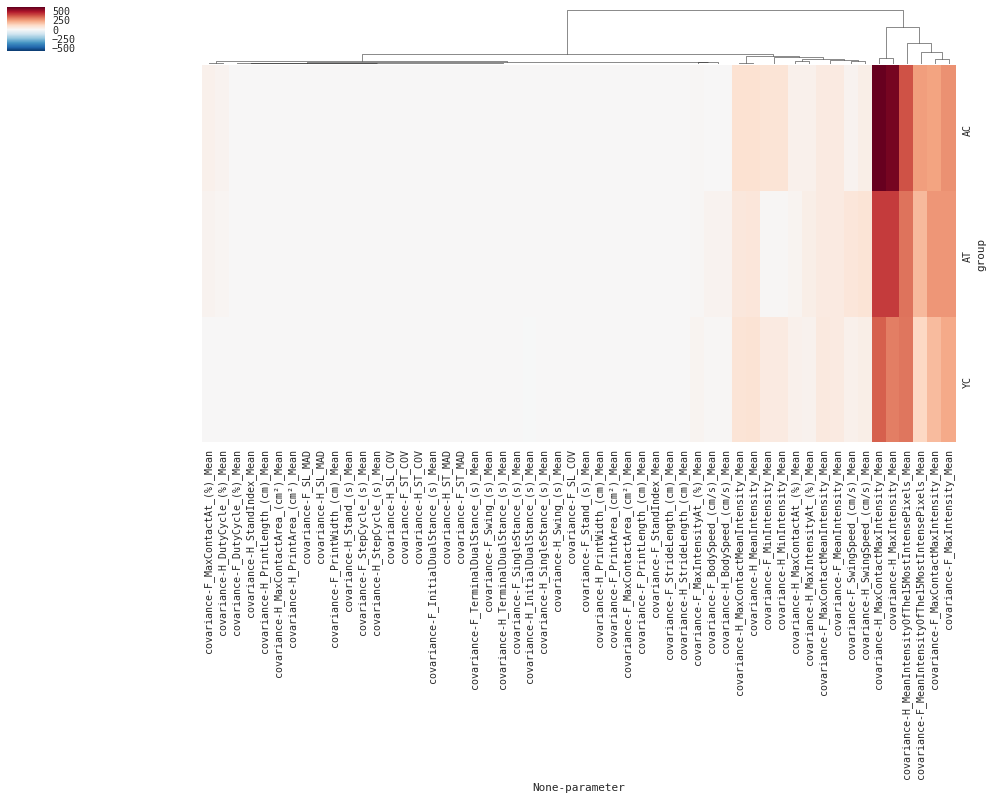

In [46]:
sns.clustermap(
    covs.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Mean squared error

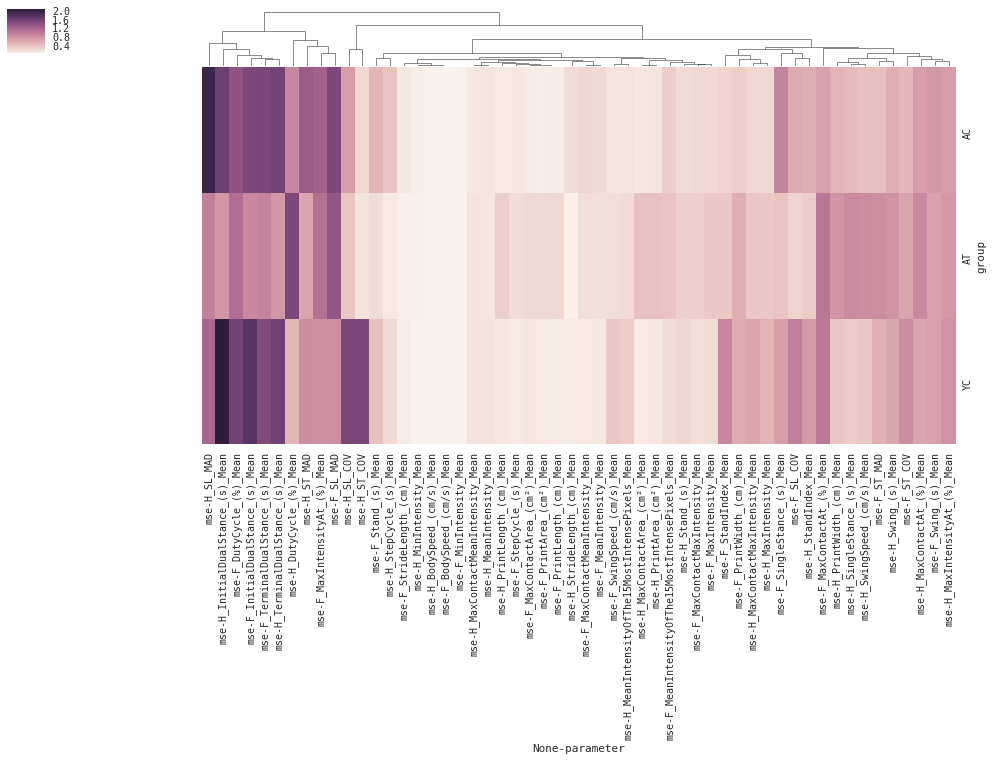

In [47]:
sns.clustermap(
    mse.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

# gait index

### 1. I'd like to know which variables seem promising: which are different between groups with p-value < 0.05?

In [48]:
selectedYA, _ = sel_anova(d, md['Group'], mode = 'classif')

print("Features selected by f_regression")
significantYA = selectedYA.ix[selectedYA.pval < 0.05]
significantYA

Features selected by f_regression


param          pval
0                                mouse length (cm)  5.771471e-16
100                       FP_PrintLength_(cm)_Mean  1.274370e-14
54                        LF_PrintLength_(cm)_Mean  5.442695e-14
8                         RF_PrintLength_(cm)_Mean  1.743071e-13
123                       HP_PrintLength_(cm)_Mean  1.799055e-12
77                        LH_PrintLength_(cm)_Mean  2.718884e-12
31                        RH_PrintLength_(cm)_Mean  5.487773e-11
97                    FP_MaxContactArea_(cm²)_Mean  8.070878e-10
5                     RF_MaxContactArea_(cm²)_Mean  9.771617e-10
102                        FP_PrintArea_(cm²)_Mean  2.148454e-09
10                         RF_PrintArea_(cm²)_Mean  2.193083e-09
87                       LH_StrideLength_(cm)_Mean  3.673875e-09
133                      HP_StrideLength_(cm)_Mean  4.192022e-09
110                      FP_StrideLength_(cm)_Mean  4.551577e-09
64                       LF_StrideLength_(cm)_Mean  5.524064e-09
51                    LF_MaxContactArea_(cm²)_Mean  5.601976e-09
18                       RF_StrideLength_(cm)_Mean  6.666511e-09
41                       RH_StrideLength_(cm)_Mean  1.080061e-08
56                         LF_PrintArea_(cm²)_Mean  1.220865e-08
125                        HP_PrintArea_(cm²)_Mean  2.064104e-08
79                         LH_PrintArea_(cm²)_Mean  4.969910e-08
120                   HP_MaxContactArea_(cm²)_Mean  5.101115e-08
74                    LH_MaxContactArea_(cm²)_Mean  1.028172e-07
33                         RH_PrintArea_(cm²)_Mean  1.225235e-07
28                    RH_MaxContactArea_(cm²)_Mean  2.542527e-07
136                       HP_SingleStance_(s)_Mean  2.135156e-05
44                        RH_SingleStance_(s)_Mean  1.009408e-04
90                        LH_SingleStance_(s)_Mean  1.274397e-04
103                     FP_MaxIntensityAt_(%)_Mean  1.514950e-04
147                                      RH_ST_COV  1.591888e-04
131                              HP_Swing_(s)_Mean  1.662838e-04
85                               LH_Swing_(s)_Mean  2.079026e-04
145                                      LH_SL_COV  3.005459e-04
142                                      RF_SL_COV  3.629348e-04
95                              FP_StandIndex_Mean  4.513239e-04
49                              LF_StandIndex_Mean  4.755026e-04
57                      LF_MaxIntensityAt_(%)_Mean  5.119413e-04
118                             HP_StandIndex_Mean  6.928290e-04
72                              LH_StandIndex_Mean  8.465407e-04
21                        RF_SingleStance_(s)_Mean  1.472454e-03
39                               RH_Swing_(s)_Mean  1.768165e-03
38   RH_MeanIntensityOfThe15MostIntensePixels_Mean  2.754846e-03
11                      RF_MaxIntensityAt_(%)_Mean  2.754865e-03
113                       FP_SingleStance_(s)_Mean  2.846522e-03
26                              RH_StandIndex_Mean  2.898179e-03
3                               RF_StandIndex_Mean  3.261193e-03
149                                      LH_ST_COV  8.948753e-03
130  HP_MeanIntensityOfThe15MostIntensePixels_Mean  1.014663e-02
144                                      LF_SL_COV  1.358834e-02
143                                      RH_SL_COV  1.469923e-02
2                                RF_Stand_(s)_Mean  1.501540e-02
67                        LF_SingleStance_(s)_Mean  1.967414e-02
35                            RH_MaxIntensity_Mean  1.987885e-02
29                  RH_MaxContactMaxIntensity_Mean  2.265485e-02
88                           LH_StepCycle_(s)_Mean  3.665322e-02
84   LH_MeanIntensityOfThe15MostIntensePixels_Mean  4.358882e-02
94                               FP_Stand_(s)_Mean  4.782083e-02

### 2. Can I combine them to some reasonable index? (gait / age index)

I am going to define RI as the weighted average of all parameters, where weights: 1/p-value:
RI = parameter * (1/pval), [0,1]

In [49]:
GI = GI_calculate(d, GI_get_weights(d, md,groups='Y-A'))
GI

Group  Group_All  Animal
Y      YC         1.1       0.291585
                  1.2       0.188509
                  1.3       0.109361
                  1.4       0.110012
                  3.2       0.188299
                  3.3       0.000000
                  3.4       0.100800
                  4.1       0.197326
                  4.2       0.055679
                  4.3       0.142992
                  4.4       0.140019
                  5.1       0.237741
                  5.2       0.275204
                  5.3       0.293742
                  5.4       0.156669
A      AC         1.1       0.790470
                  1.2       0.706072
                  1.3       0.181107
                  1.4       0.533828
                  2.1       0.804847
                  2.2       0.626384
                  2.3       0.900883
                  2.4       0.814118
                  3.1       0.911888
                  3.2       1.000000
       AT         1.1       0.636190
             

In [50]:
# cross-validate on the dataset: how well can a subset of data
# recreate RI for a hidden portion of data?
# The mean diffrence is
pd.concat(GI_CV(d, md, n_trials = 100, test_size=0.25)).mean()

0.07919442575388833

'cross-validate' on the dataset: how well can a subset of data
recreate RI for a hidden portion of data?
The mean diffrence is
about 7%

Let's plot the Index

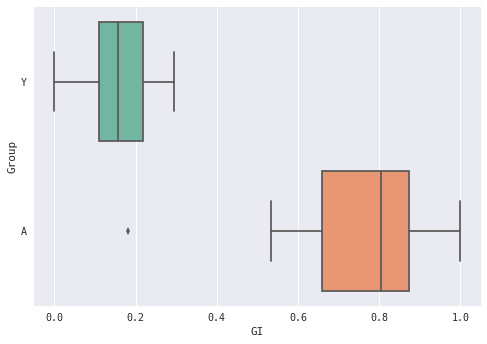

In [51]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', palette=color_map);

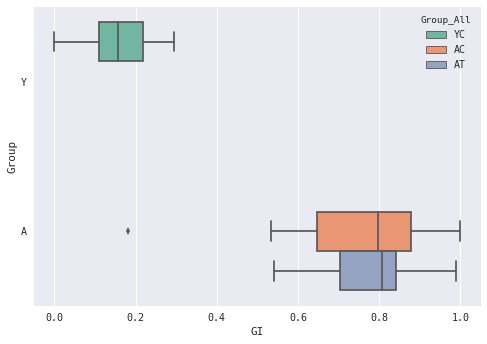

In [52]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', hue='Group_All', palette = color_mapYAT);

# gait index - again,only p-values are derived from comparison of YC to AC

In [53]:
# MODIFICATION: Compare only groups Young Control and Aged Control
selectedYAT, _ = sel_anova(d.ix[md['Group_All']!='AT'],
                md.ix[md['Group_All']!='AT']['Group_All'], mode = 'classif')

print("Features selected by f_regression")
significantYAT = selectedYAT.ix[selectedYAT.pval < 0.05]
significantYAT

Features selected by f_regression


param          pval
0                  mouse length (cm)  1.954270e-08
100         FP_PrintLength_(cm)_Mean  6.228406e-07
54          LF_PrintLength_(cm)_Mean  8.378691e-07
8           RF_PrintLength_(cm)_Mean  1.079074e-06
64         LF_StrideLength_(cm)_Mean  2.586839e-06
110        FP_StrideLength_(cm)_Mean  3.167068e-06
136         HP_SingleStance_(s)_Mean  5.935064e-06
18         RF_StrideLength_(cm)_Mean  6.707434e-06
90          LH_SingleStance_(s)_Mean  7.976687e-06
77          LH_PrintLength_(cm)_Mean  8.713701e-06
123         HP_PrintLength_(cm)_Mean  1.234425e-05
31          RH_PrintLength_(cm)_Mean  3.311268e-05
133        HP_StrideLength_(cm)_Mean  3.547066e-05
87         LH_StrideLength_(cm)_Mean  4.105829e-05
131                HP_Swing_(s)_Mean  4.614714e-05
41         RH_StrideLength_(cm)_Mean  6.171538e-05
44          RH_SingleStance_(s)_Mean  1.061010e-04
5       RF_MaxContactArea_(cm²)_Mean  1.840521e-04
113         FP_SingleStance_(s)_Mean  2.126923e-04
85                 LH_Swing_(s)_Mean  2.193550e-04
97      FP_MaxContactArea_(cm²)_Mean  3.146561e-04
10           RF_PrintArea_(cm²)_Mean  3.288342e-04
102          FP_PrintArea_(cm²)_Mean  4.914862e-04
39                 RH_Swing_(s)_Mean  5.425154e-04
51      LF_MaxContactArea_(cm²)_Mean  7.448321e-04
21          RF_SingleStance_(s)_Mean  7.495027e-04
95                FP_StandIndex_Mean  8.197295e-04
56           LF_PrintArea_(cm²)_Mean  9.445647e-04
125          HP_PrintArea_(cm²)_Mean  9.551861e-04
33           RH_PrintArea_(cm²)_Mean  1.054838e-03
120     HP_MaxContactArea_(cm²)_Mean  1.083304e-03
28      RH_MaxContactArea_(cm²)_Mean  1.120440e-03
79           LH_PrintArea_(cm²)_Mean  1.296371e-03
74      LH_MaxContactArea_(cm²)_Mean  1.411702e-03
57        LF_MaxIntensityAt_(%)_Mean  1.424559e-03
67          LF_SingleStance_(s)_Mean  1.440016e-03
72                LH_StandIndex_Mean  1.463916e-03
103       FP_MaxIntensityAt_(%)_Mean  1.681606e-03
3                 RF_StandIndex_Mean  2.727798e-03
118               HP_StandIndex_Mean  2.759767e-03
49                LF_StandIndex_Mean  2.949106e-03
2                  RF_Stand_(s)_Mean  4.663150e-03
94                 FP_Stand_(s)_Mean  7.123286e-03
7    RF_MaxContactMeanIntensity_Mean  1.337877e-02
99   FP_MaxContactMeanIntensity_Mean  1.377072e-02
19             RF_StepCycle_(s)_Mean  1.453730e-02
147                        RH_ST_COV  1.551884e-02
14             RF_MeanIntensity_Mean  1.563189e-02
142                        RF_SL_COV  1.647181e-02
53   LF_MaxContactMeanIntensity_Mean  1.737581e-02
88             LH_StepCycle_(s)_Mean  1.744263e-02
111            FP_StepCycle_(s)_Mean  1.749097e-02
106            FP_MeanIntensity_Mean  1.771375e-02
134            HP_StepCycle_(s)_Mean  1.896038e-02
26                RH_StandIndex_Mean  1.896596e-02
11        RF_MaxIntensityAt_(%)_Mean  2.213487e-02
65             LF_StepCycle_(s)_Mean  2.390667e-02
60             LF_MeanIntensity_Mean  2.421931e-02
48                 LF_Stand_(s)_Mean  2.523979e-02
42             RH_StepCycle_(s)_Mean  3.228895e-02
157                        LH_ST_MAD  4.995282e-02

### 2. Can I combine them to some reasonable index? (gait / age index)

I am going to define RI as the weighted average of all parameters, where weights: 1/p-value:
RI = parameter * (1/pval), [0,1]

In [54]:
GI = GI_calculate(d, GI_get_weights(d, md, groups="YC-AC"))
GI

Group  Group_All  Animal
Y      YC         1.1       0.298010
                  1.2       0.194616
                  1.3       0.124013
                  1.4       0.117386
                  3.2       0.190085
                  3.3       0.000000
                  3.4       0.106767
                  4.1       0.202216
                  4.2       0.067377
                  4.3       0.145218
                  4.4       0.143830
                  5.1       0.241953
                  5.2       0.274813
                  5.3       0.286119
                  5.4       0.154801
A      AC         1.1       0.790093
                  1.2       0.712262
                  1.3       0.195365
                  1.4       0.540438
                  2.1       0.813655
                  2.2       0.635886
                  2.3       0.909640
                  2.4       0.822605
                  3.1       0.913257
                  3.2       1.000000
       AT         1.1       0.642991
             

In [55]:
# cross-validate on the dataset: how well can a subset of data
# recreate RI for a hidden portion of data?
# The mean diffrence is
pd.concat(GI_CV(d, md, n_trials = 100, test_size=0.25)).mean()

0.06795315379251826

'cross-validate' on the dataset: how well can a subset of data
recreate RI for a hidden portion of data?
The mean diffrence is
about 7%

Let's plot the Index

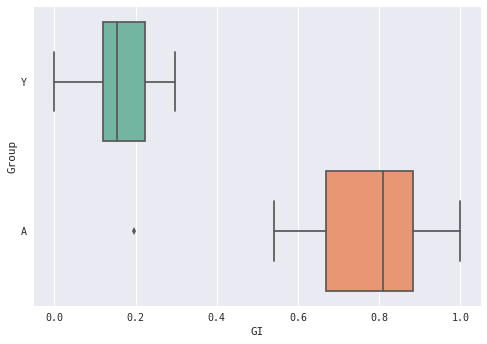

In [56]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', palette = color_map);

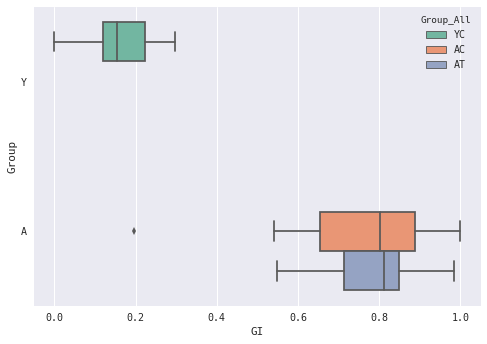

In [57]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', hue='Group_All', palette = color_mapYAT);

The p-values of anova-based selection of parameters are very similar for comparison between:

a) YC and AC+AT

b) YC and AC

# Comparison of right and left side parameters

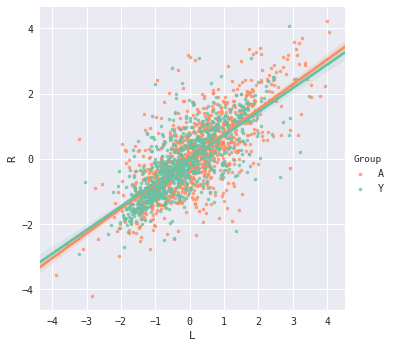

In [66]:
d_plot = plot_L_R(d, use_level=0)
sns.lmplot(x='L', y='R', data=d_plot, hue='Group',  markers=".", palette=color_map);

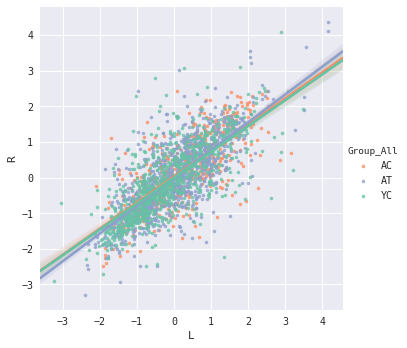

In [67]:
d_plot = plot_L_R(d, use_level=1)
sns.lmplot(x='L', y='R', data=d_plot, hue='Group_All',  markers=".", palette=color_mapYAT);

Each point on the plot represents a sided parameter.

In [61]:
d_plot.groupby('Group').mean()

L         R
Group                    
A      0.143339  0.108834
Y     -0.191119 -0.145112

The table shows the mean value of the left and right side parameters in young and aged mice. Collapsing mice to correlation isn't a good choice because one mouse may have damaged left brain side and another right, which would cancel out.
This may be assessed with errors / stdev.

In [62]:
d_plot.groupby('Group').std()

L         R
Group                    
A      1.138195  1.173607
Y      1.029833  1.011619

The table shows standard deviation of the left and right side parameters in young and aged mice. There may be some difference? But small.

# Correlations between right and left side parameters

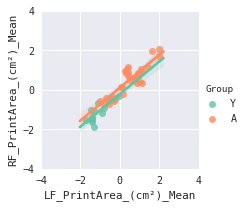

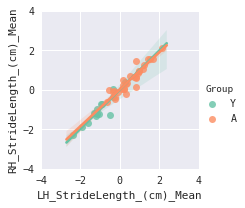

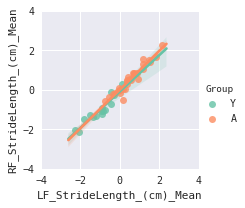

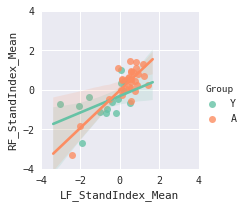

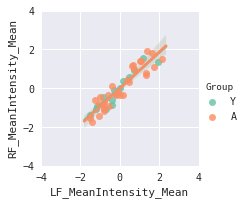

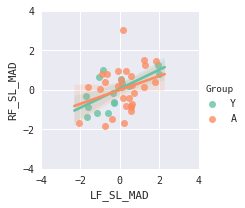

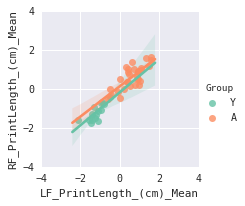

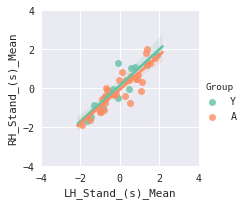

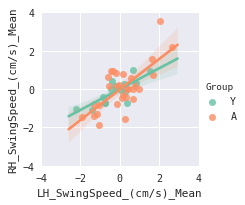

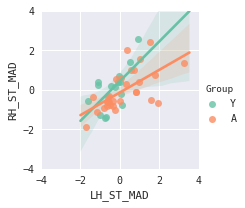

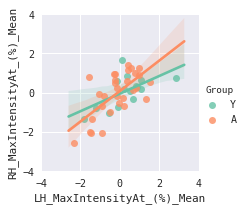

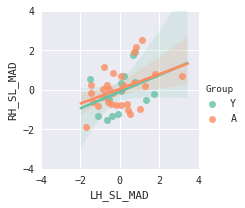

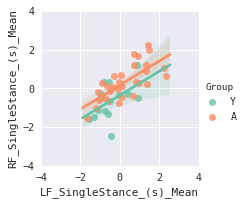

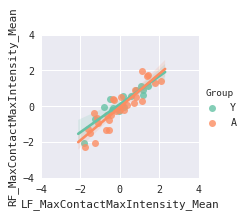

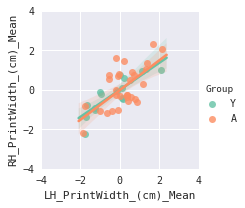

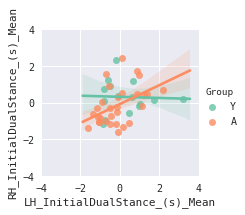

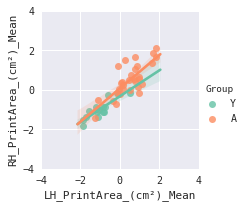

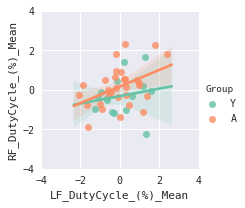

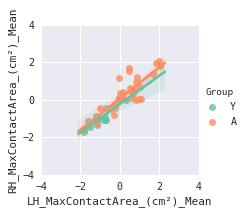

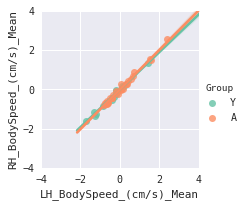

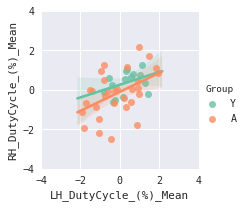

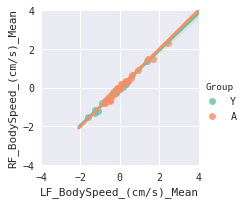

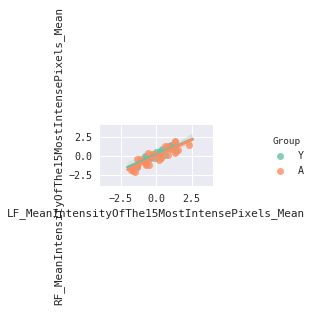

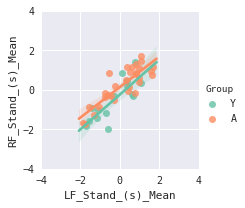

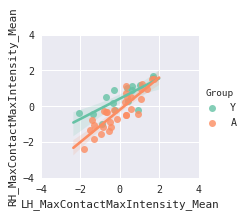

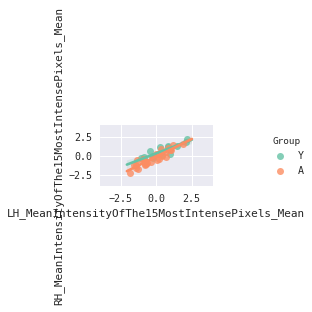

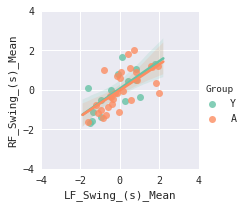

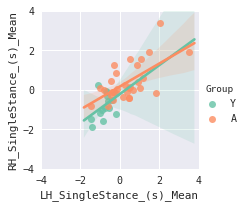

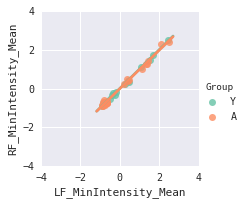

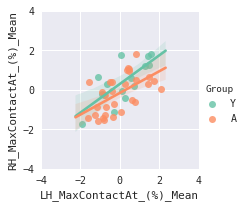

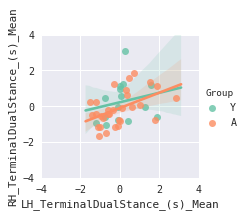

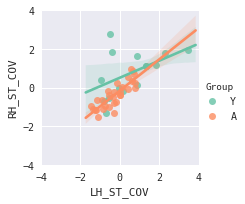

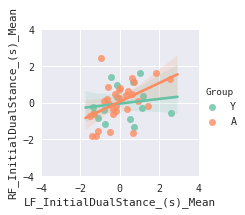

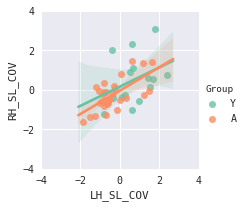

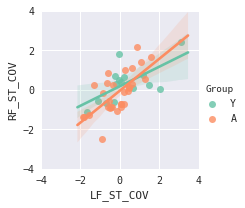

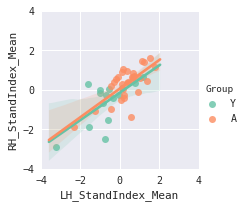

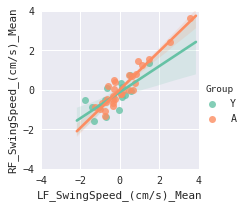

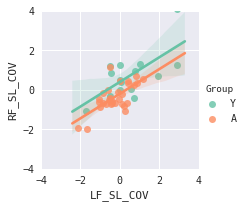

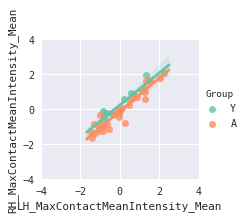

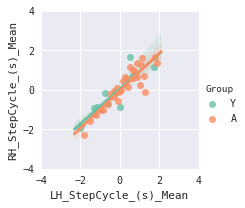

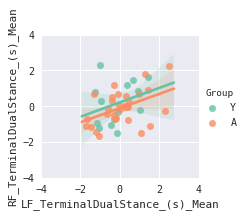

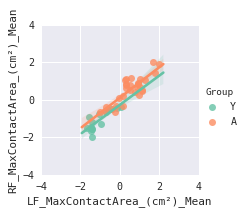

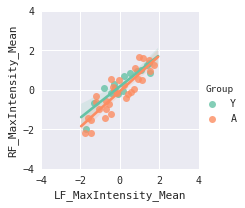

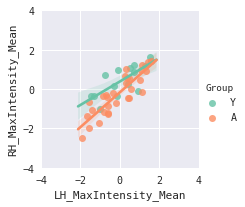

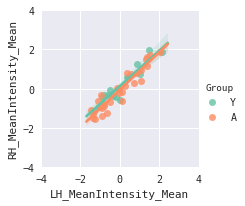

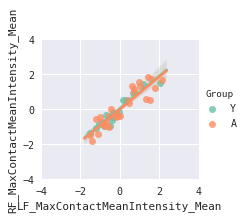

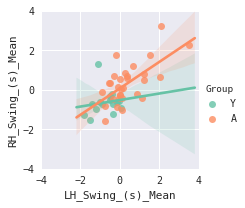

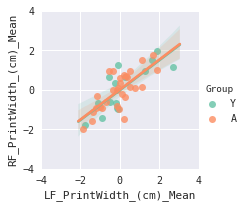

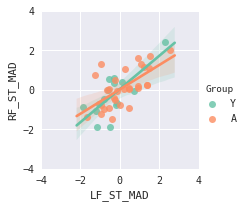

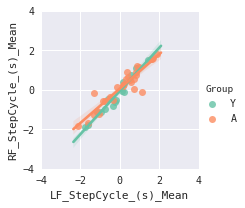

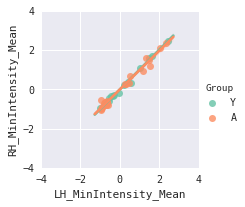

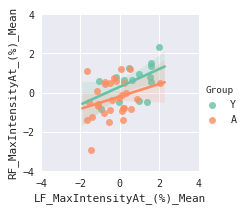

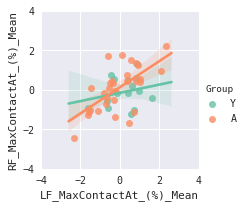

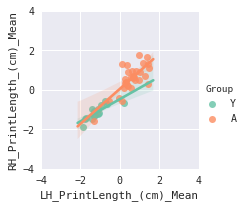

In [63]:
plot_relationships(d, palette=color_map, cut = [-4,4])

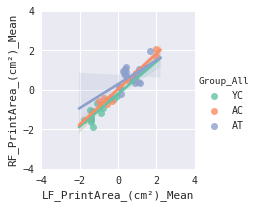

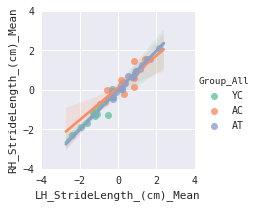

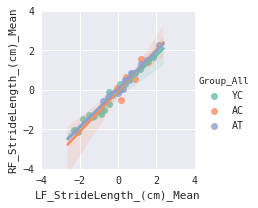

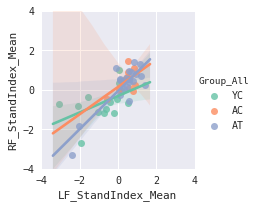

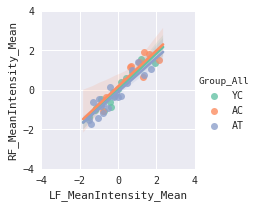

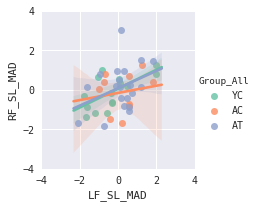

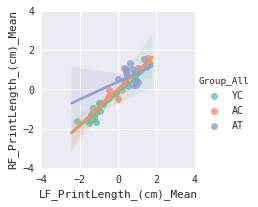

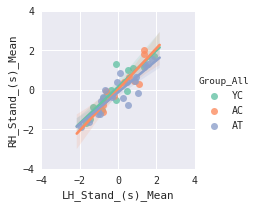

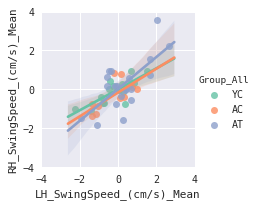

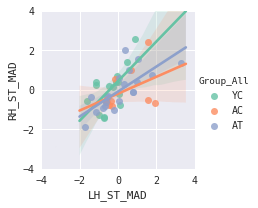

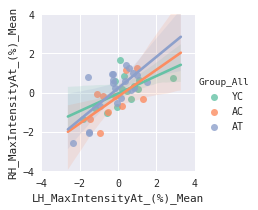

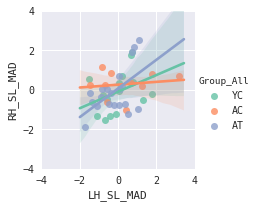

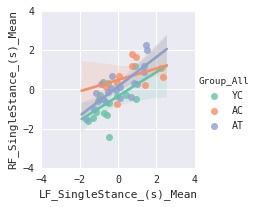

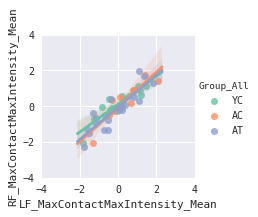

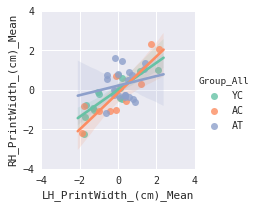

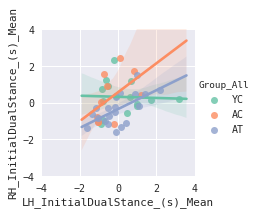

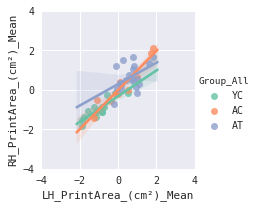

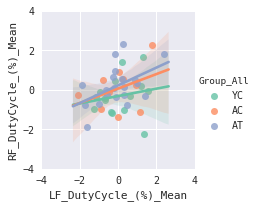

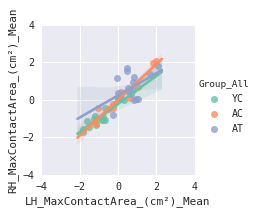

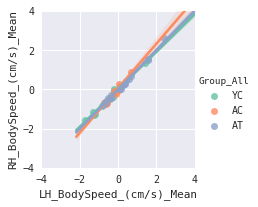

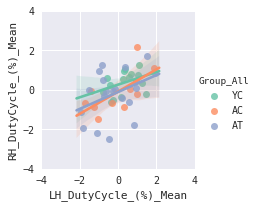

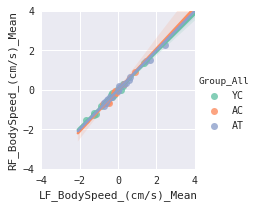

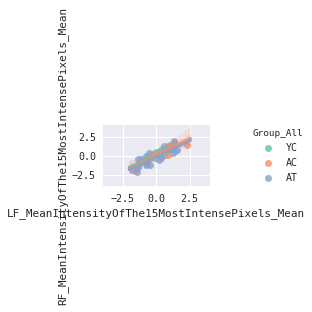

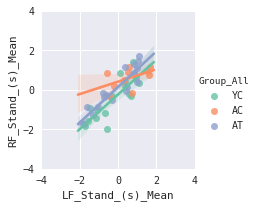

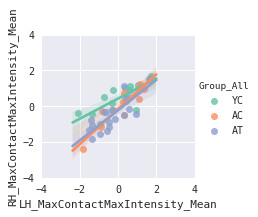

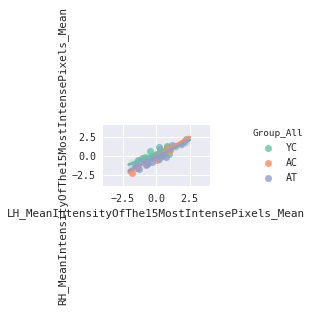

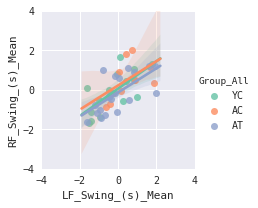

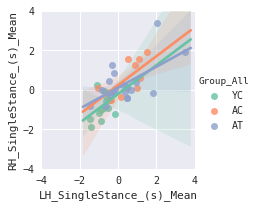

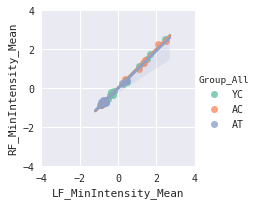

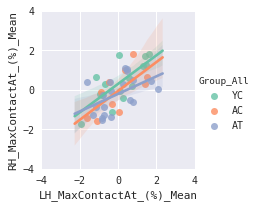

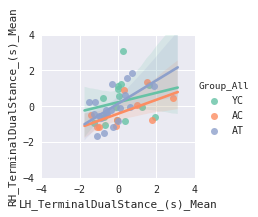

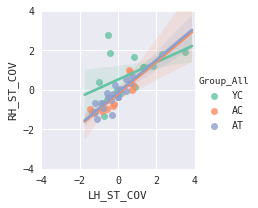

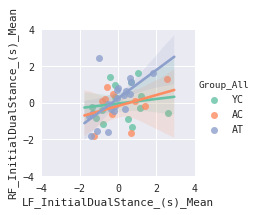

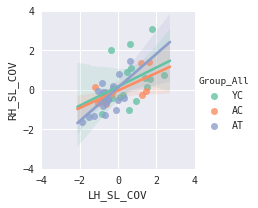

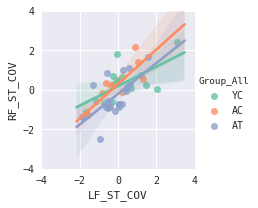

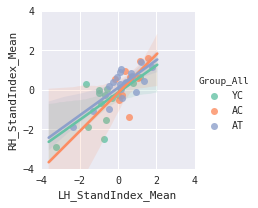

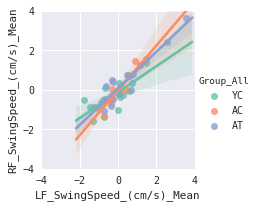

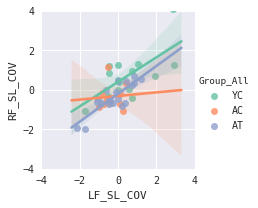

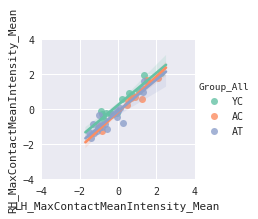

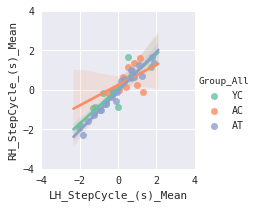

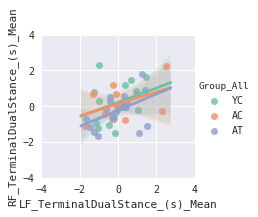

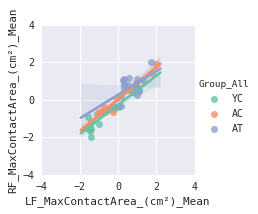

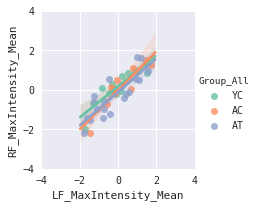

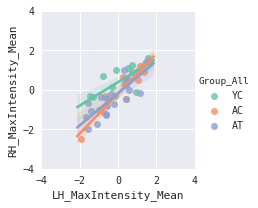

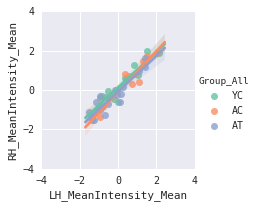

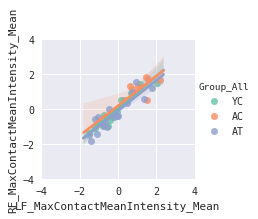

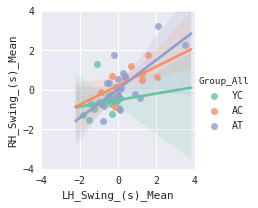

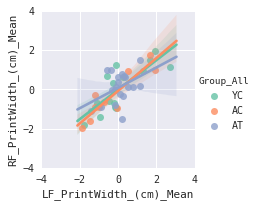

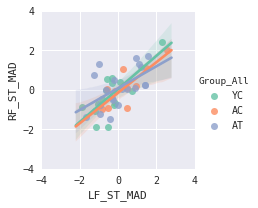

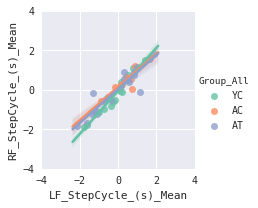

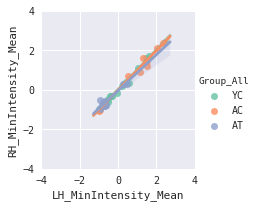

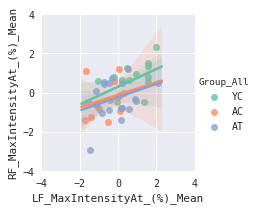

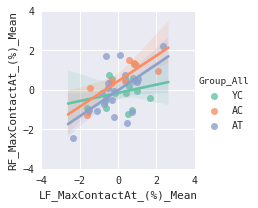

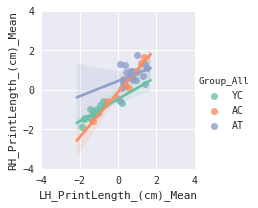

In [64]:
plot_relationships(d, palette=color_mapYAT, hue = "Group_All", cut = [-4,4])

- comparison of which of those makes sense?
- some are pretty scattered.